In [40]:
import matplotlib.pyplot as plt
import numpy as np
import casperfpga
import time
from lwa_f import snap2_fengine
from lwa_f import blocks
#from lwautils import lwa_arx 
import pandas as pd
from cr_functions import *
import struct
import math
from scipy import special as sp
from scipy import optimize as oz
from scipy import stats as st
from lwa_antpos import mapping
import os

In [41]:
#filenames to save

fnameout='/home/ubuntu/kp/data/March2/coincident_trigger_threshold_scan.npy'
fnamec='/home/ubuntu/kp/data/March2/individual-antenna-scans-c.npy'
fnamev='/home/ubuntu/kp/data/March2/individual-antenna-scans-v.npy'



In [42]:
brdnames=['snap01','snap02','snap03','snap04','snap05','snap06','snap07','snap08','snap09','snap10','snap11']
#casperbrds = [casperfpga.CasperFpga(brdname, transport=casperfpga.TapcpTransport) for brdname in brdnames]
casperbrds = [snap2_fengine.Snap2FengineEtcd(brdname).fpga for brdname in brdnames]

#this is not actually the file but it has the necessary info for the ethernet block
fpgfile='/home/ubuntu/kp/caltech-lwa/snap2_f_200msps_64i_4096c/outputs/snap2_f_200msps_64i_4096c.fpg'



2024-03-03 05:13:43,927 - lwa_f.blocks.block:snap01 - INFO - eth - Couldn't find Ethernet core. Will retry later
2024-03-03 05:13:43,932 - lwa_f.blocks.block:snap02 - INFO - eth - Couldn't find Ethernet core. Will retry later
2024-03-03 05:13:43,937 - lwa_f.blocks.block:snap03 - INFO - eth - Couldn't find Ethernet core. Will retry later
2024-03-03 05:13:43,942 - lwa_f.blocks.block:snap04 - INFO - eth - Couldn't find Ethernet core. Will retry later
2024-03-03 05:13:43,947 - lwa_f.blocks.block:snap05 - INFO - eth - Couldn't find Ethernet core. Will retry later
2024-03-03 05:13:43,952 - lwa_f.blocks.block:snap06 - INFO - eth - Couldn't find Ethernet core. Will retry later
2024-03-03 05:13:43,957 - lwa_f.blocks.block:snap07 - INFO - eth - Couldn't find Ethernet core. Will retry later
2024-03-03 05:13:43,962 - lwa_f.blocks.block:snap08 - INFO - eth - Couldn't find Ethernet core. Will retry later
2024-03-03 05:13:43,966 - lwa_f.blocks.block:snap09 - INFO - eth - Couldn't find Ethernet core. 

In [43]:
casperbrds[0].listdev()


['aaa_onegbe_one_GbE',
 'adc_sync',
 'ads5296_controller0_0',
 'ads5296_controller0_1',
 'ads5296_controller1_0',
 'ads5296_controller1_1',
 'ads5296_hardware_rst0',
 'ads5296_hardware_rst1',
 'ads5296_spi_controller0',
 'ads5296_spi_controller1',
 'ads5296_wb_ram0_0_0',
 'ads5296_wb_ram0_0_1',
 'ads5296_wb_ram0_0_2',
 'ads5296_wb_ram0_0_3',
 'ads5296_wb_ram0_1_0',
 'ads5296_wb_ram0_1_1',
 'ads5296_wb_ram0_1_2',
 'ads5296_wb_ram0_1_3',
 'ads5296_wb_ram1_0_0',
 'ads5296_wb_ram1_0_1',
 'ads5296_wb_ram1_0_2',
 'ads5296_wb_ram1_0_3',
 'ads5296_wb_ram1_1_0',
 'ads5296_wb_ram1_1_1',
 'ads5296_wb_ram1_1_2',
 'ads5296_wb_ram1_1_3',
 'autocorr_acc_cnt',
 'autocorr_acc_len',
 'autocorr_common_dout0_bram',
 'autocorr_common_dout1_bram',
 'autocorr_common_dout2_bram',
 'autocorr_common_dout3_bram',
 'autocorr_common_dout4_bram',
 'autocorr_common_dout5_bram',
 'autocorr_common_dout6_bram',
 'autocorr_common_dout7_bram',
 'autocorr_mux_sel',
 'autocorr_trig',
 'chan_reorder_dynamic_map1',
 'corr_0_

## Single-antenna threshold scans

In [44]:
thresholds = 8*np.asarray(range(64))
vthresholds = np.flip(thresholds)
results_core = np.zeros((64,64,11))
results_veto = np.zeros((64,64,11))

[setup_data_source(casperbrd,"adc") for casperbrd in casperbrds]


for i in range(len(thresholds)):
    t_c = thresholds[i]
    t_v = vthresholds[i]
    [setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",int(t_c**2)) for casperbrd in casperbrds]
    [setvalue(casperbrd,"veto_power_thresh","cr_registers.xlsx",int(t_v**2)) for casperbrd in casperbrds]
    time.sleep(2.75)  #have to wait for it to update
    
    #read results for this threshold
    for b, casperbrd in enumerate(casperbrds):
        core,veto = read_threshold_rates(casperbrd)
        results_core[:,i,b] = core
        results_veto[:,i,b] = veto



Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc
Data source set to adc


In [45]:
##############

In [46]:
np.save(fnamec,results_core)
np.save(fnamev,results_veto)

LWA-257A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<Figure size 432x288 with 0 Axes>

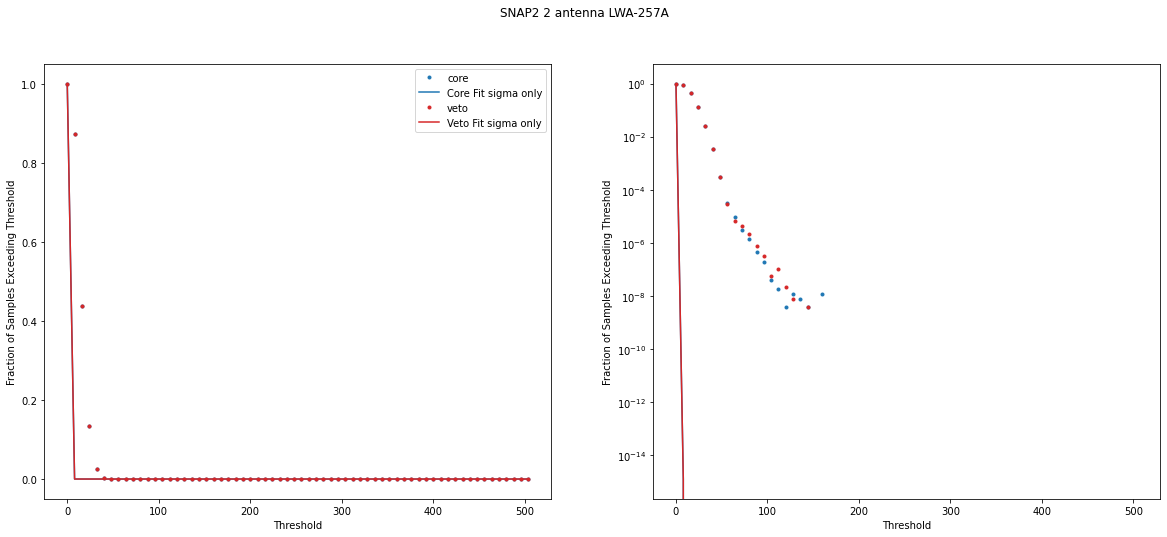

LWA-257B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


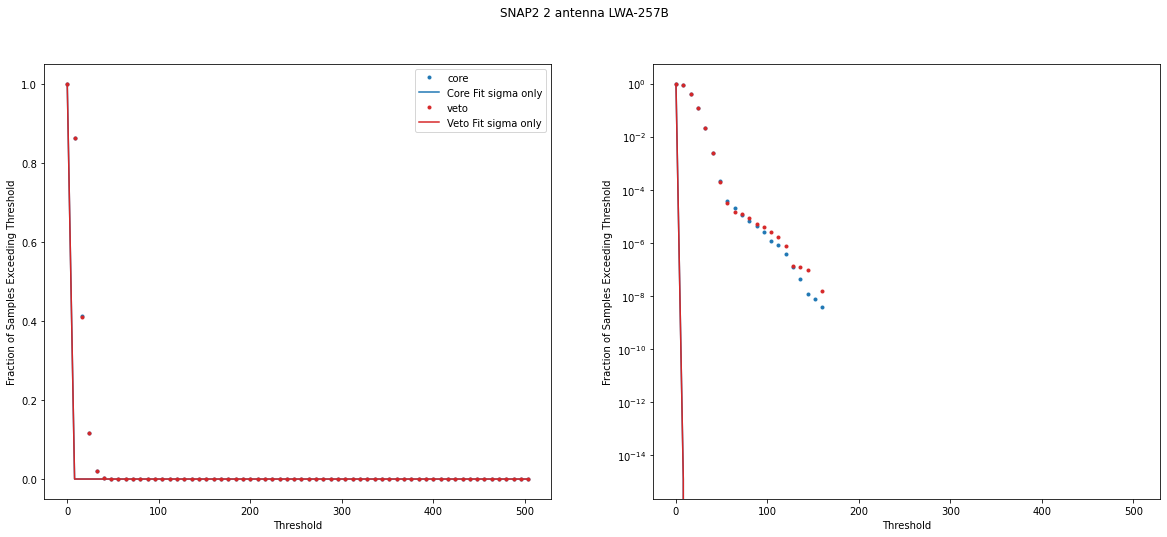

LWA-255A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


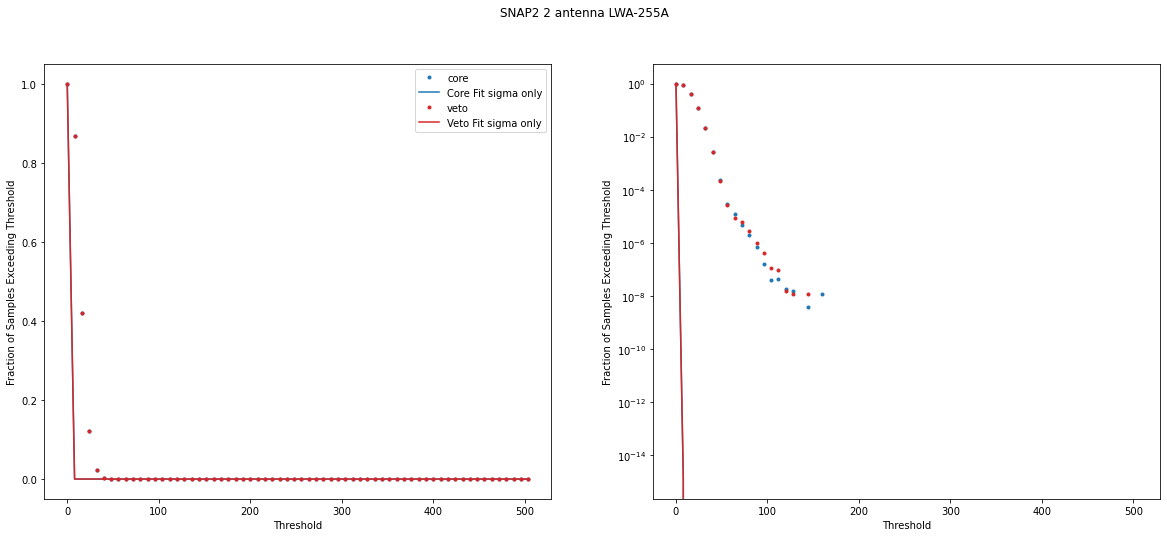

LWA-255B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


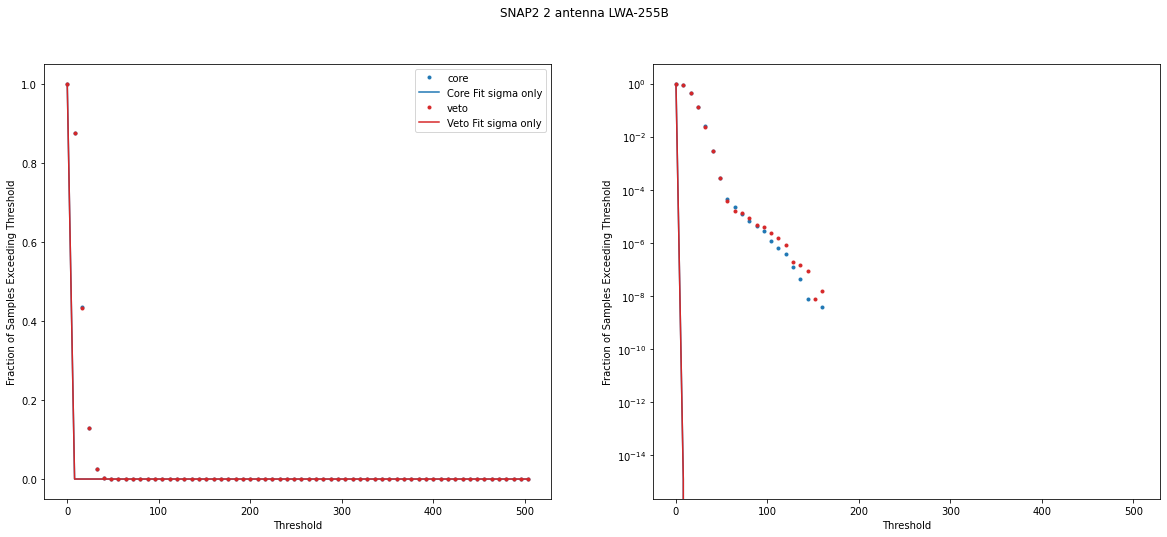

LWA-260A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


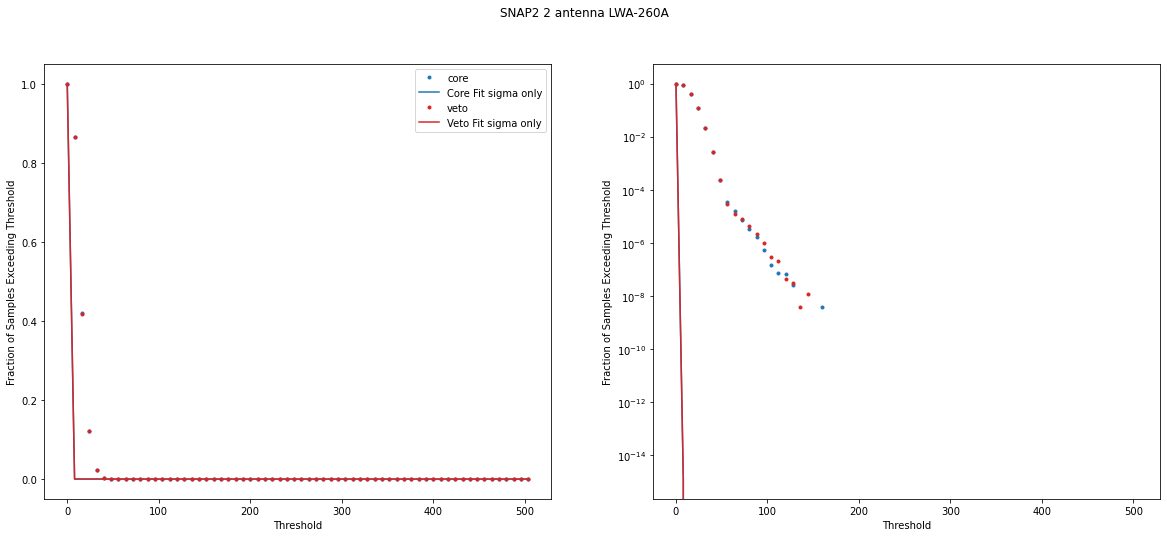

LWA-260B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


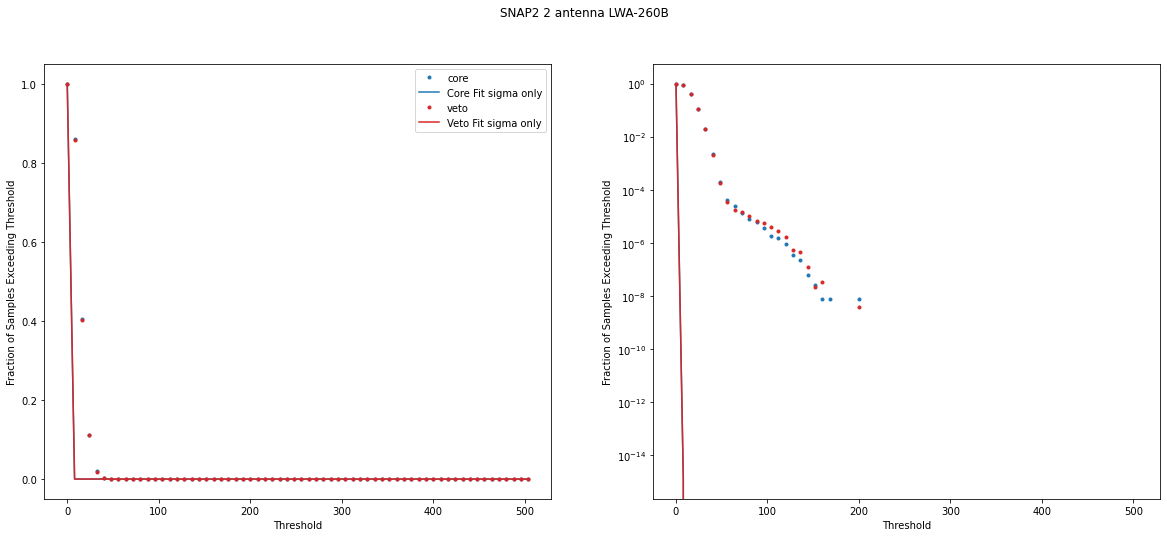

LWA-258A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


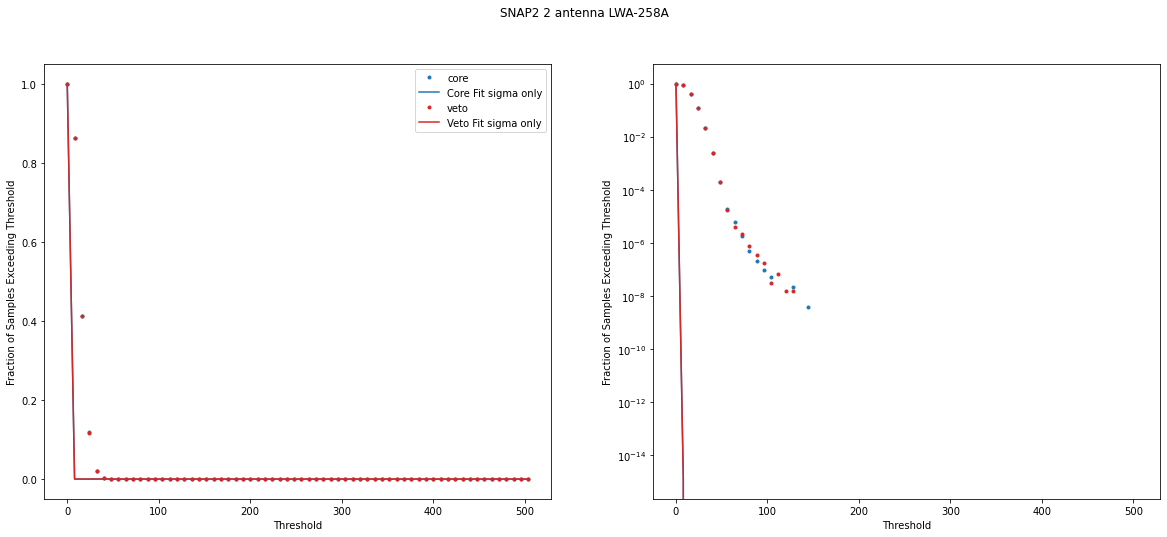

LWA-258B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


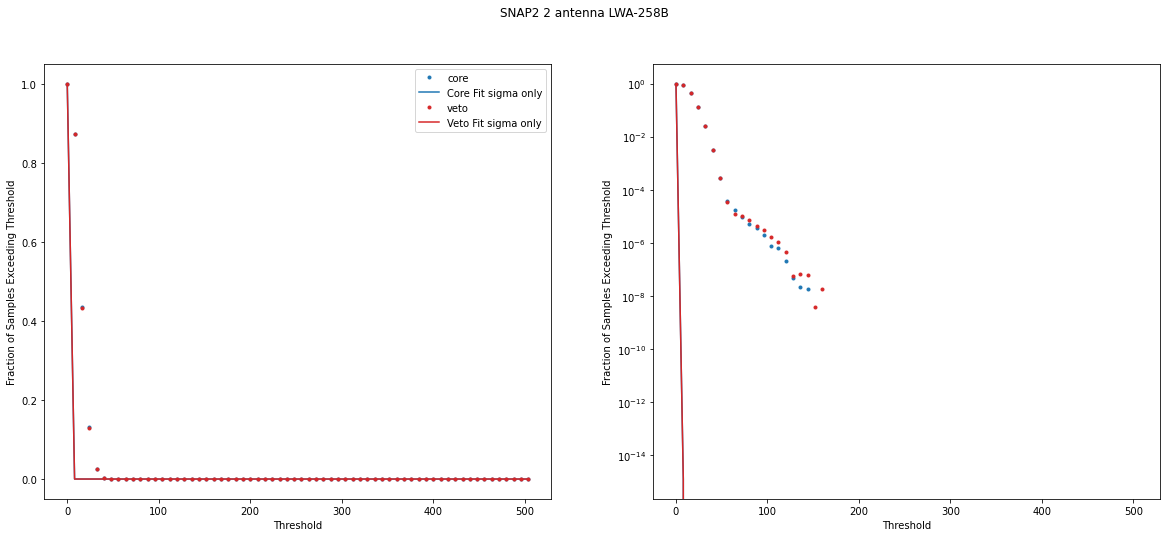

LWA-265A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


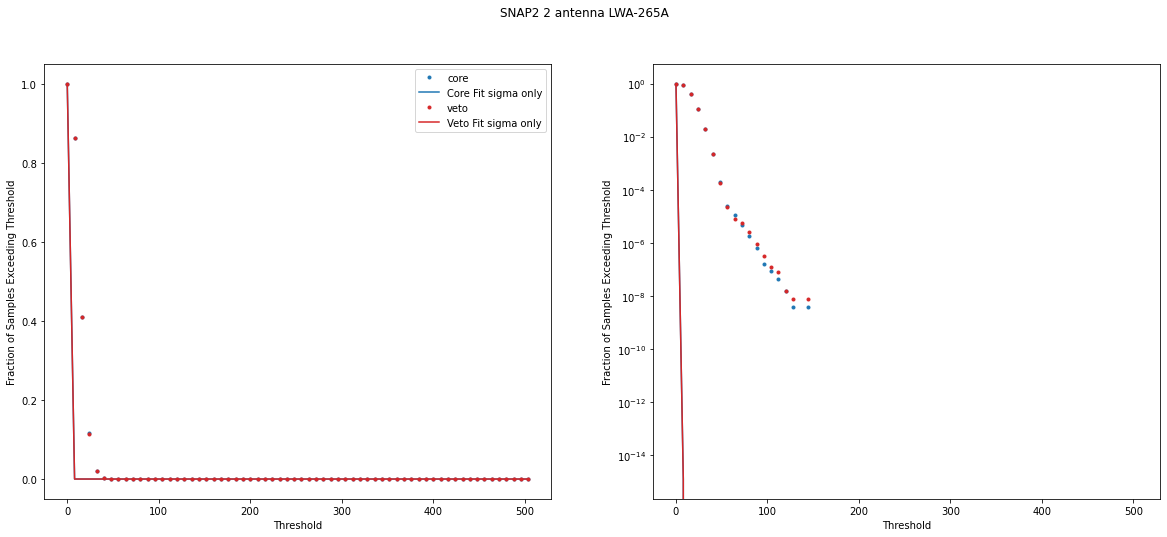

LWA-265B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


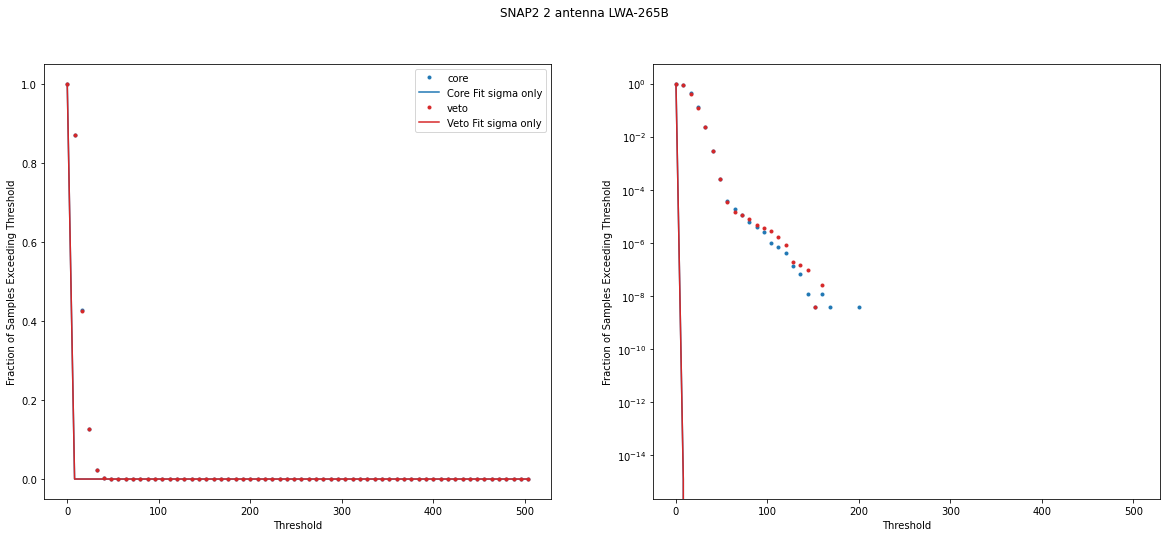

LWA-263A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


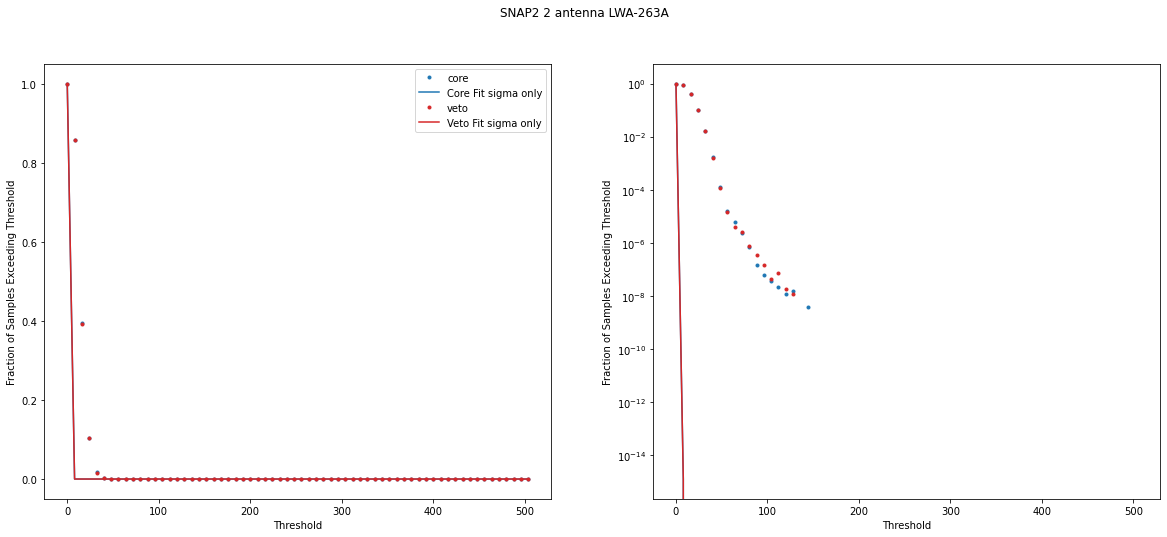

LWA-263B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


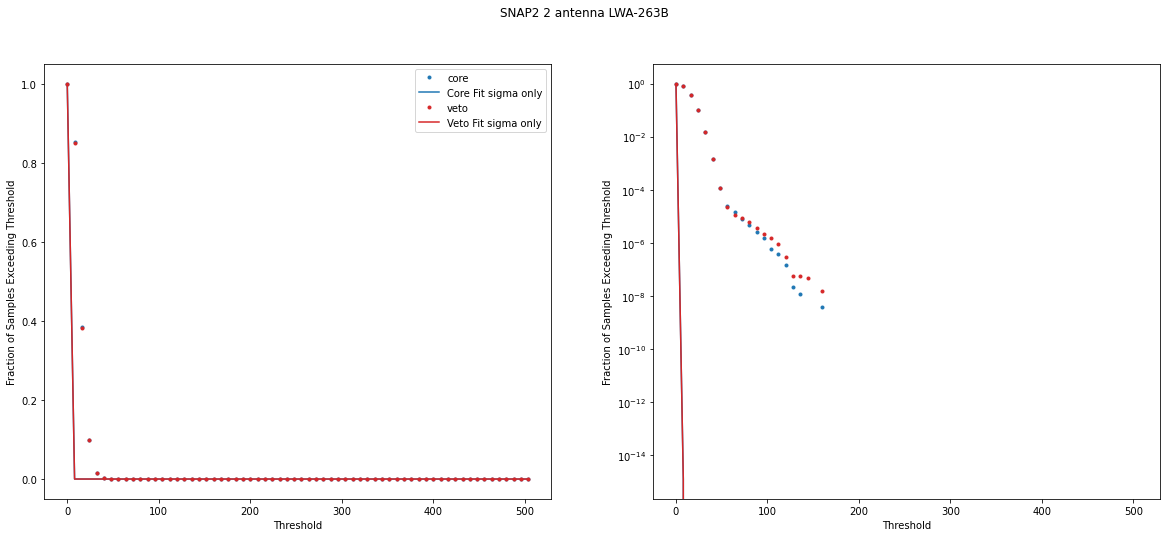

LWA-272A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


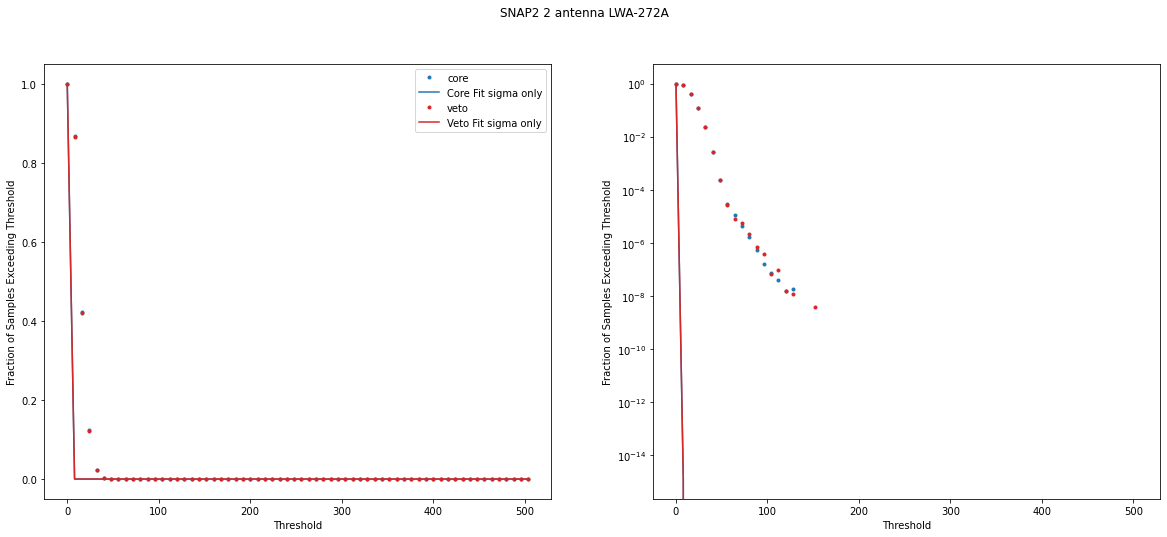

LWA-272B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


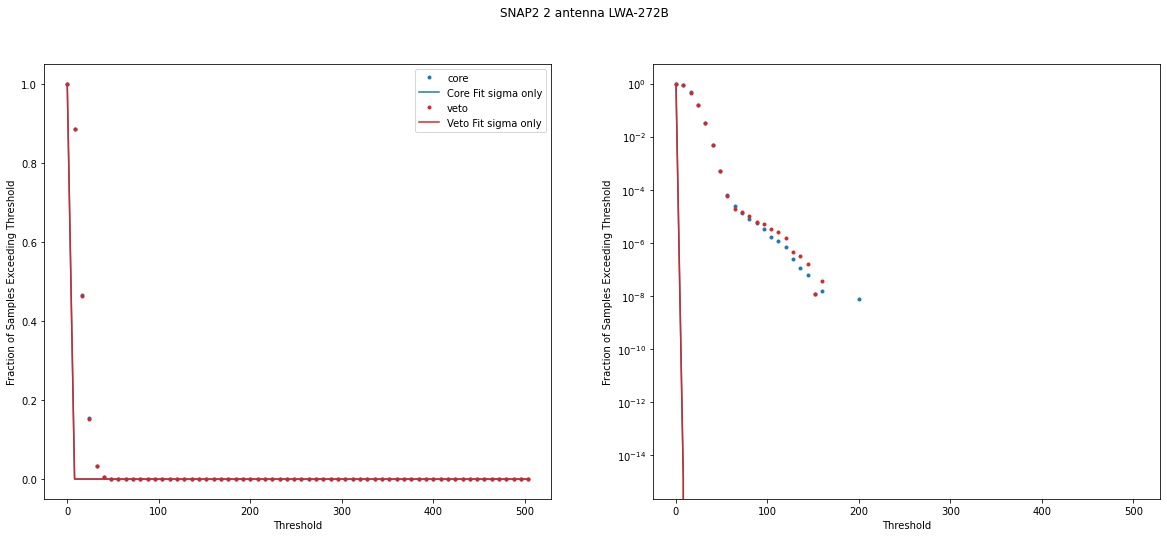

LWA-270A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


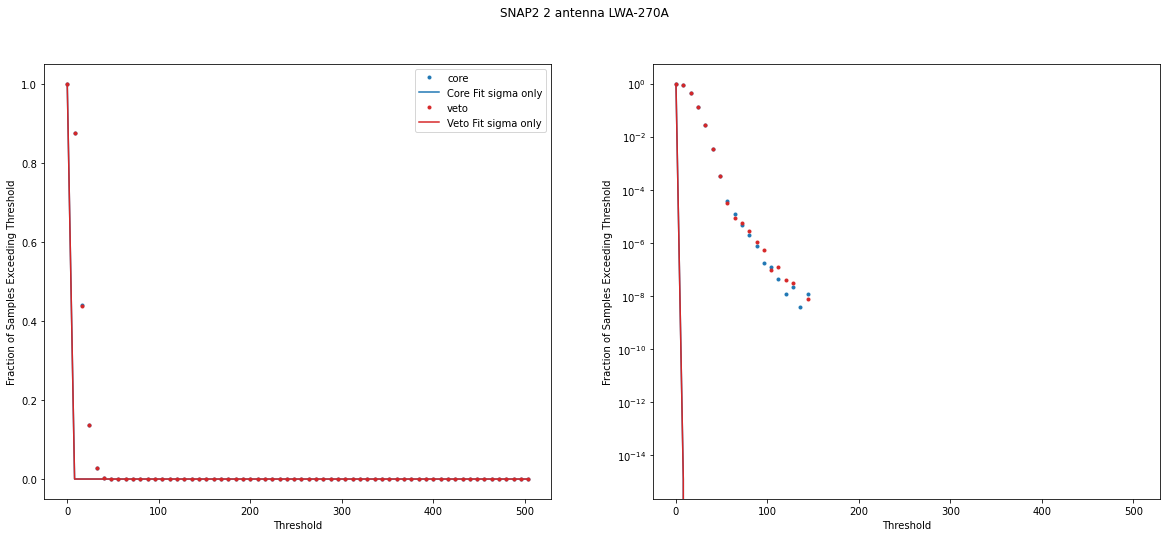

LWA-270B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


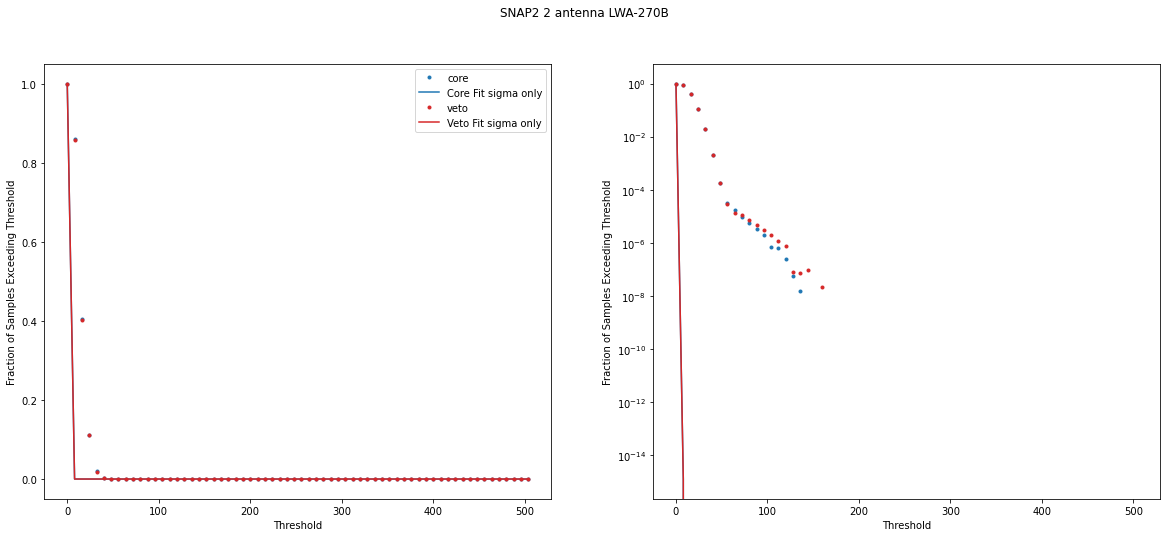

LWA-283A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


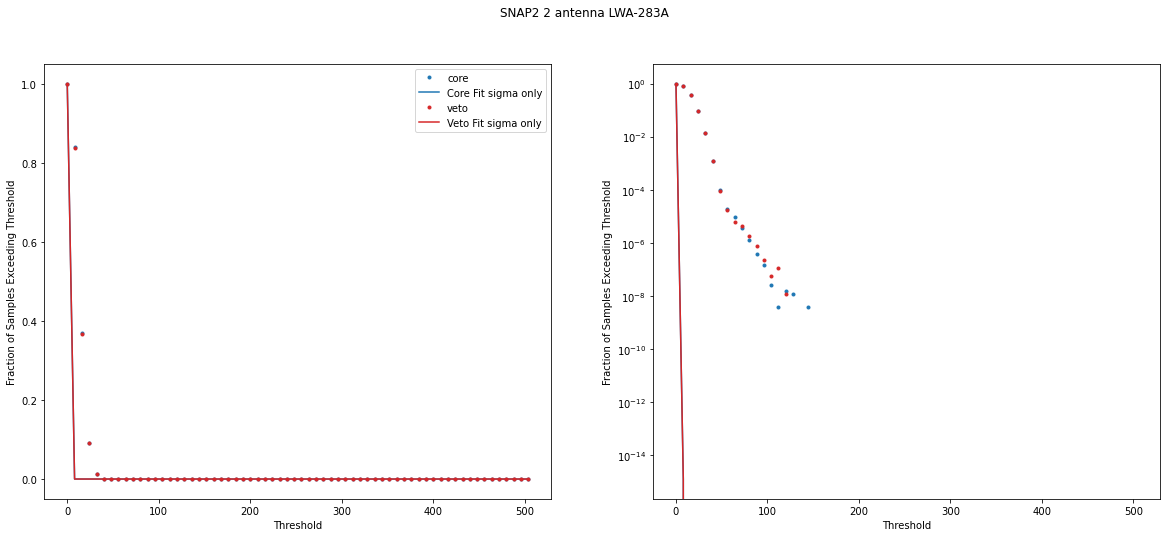

LWA-283B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


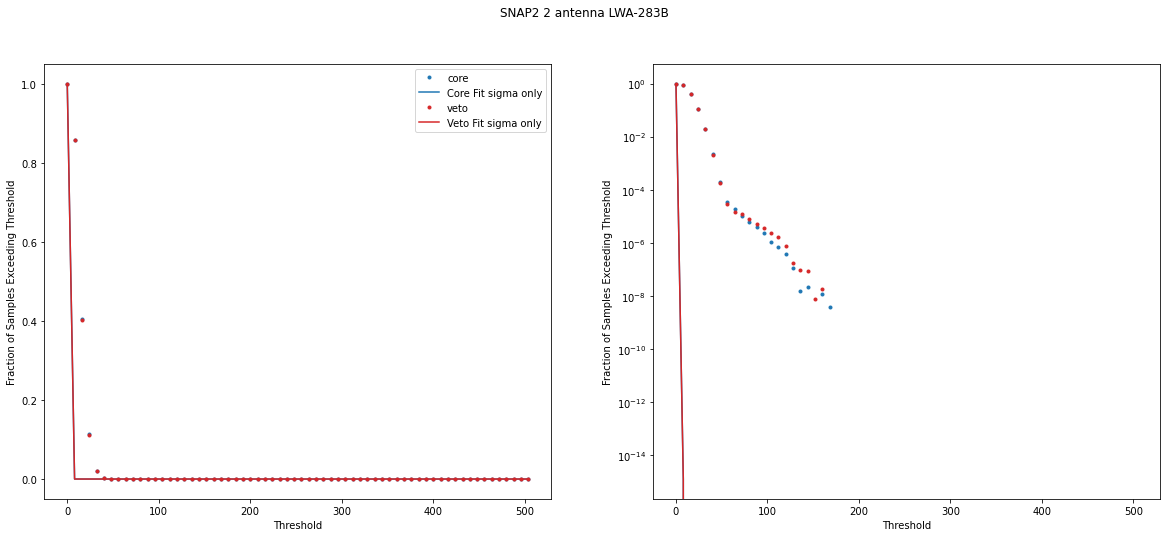

LWA-280A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


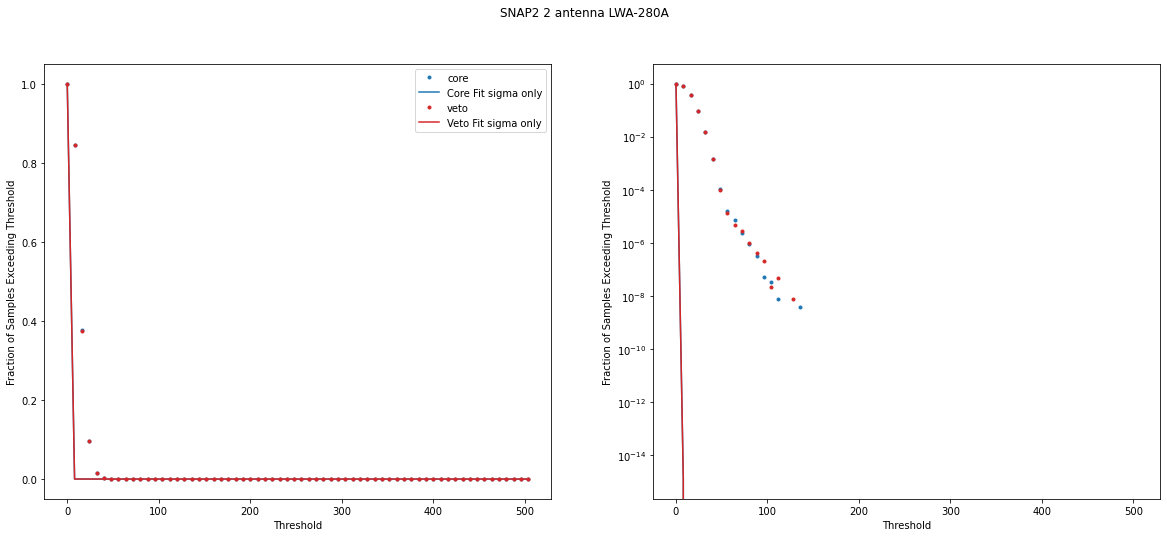

LWA-280B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


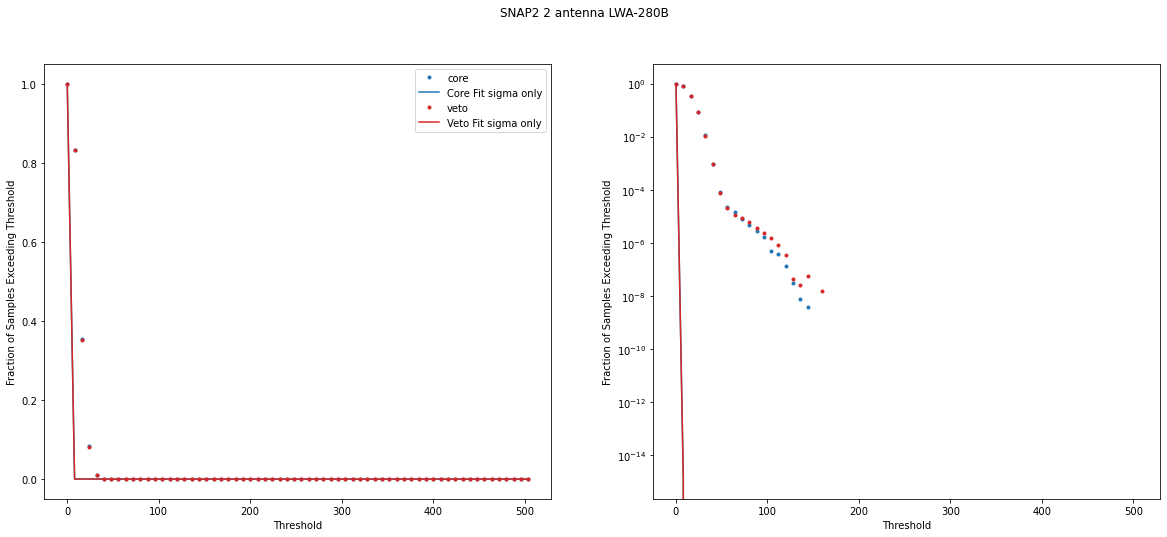

LWA-288A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


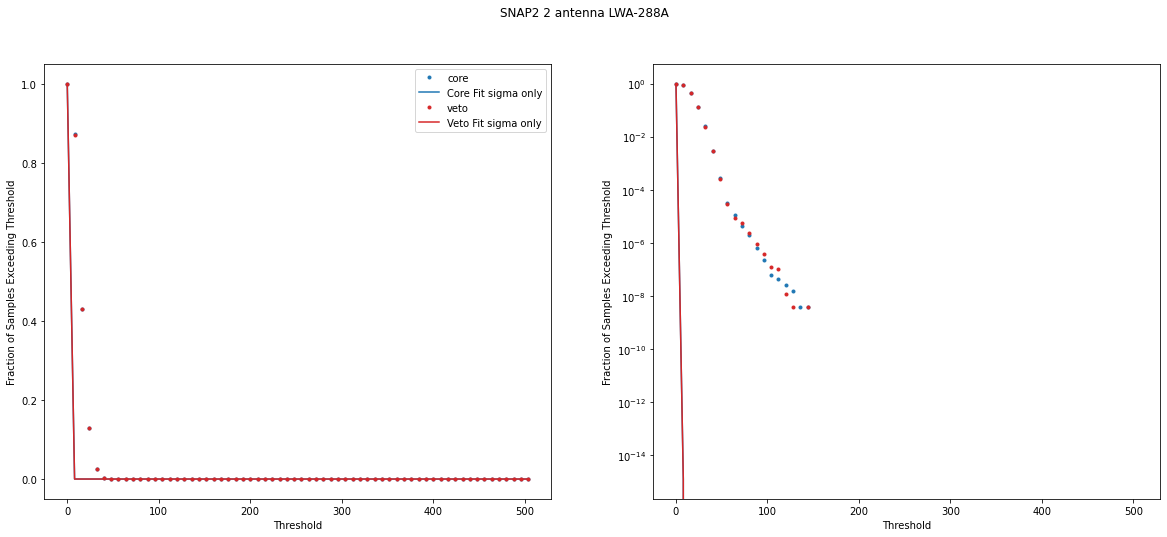

LWA-288B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


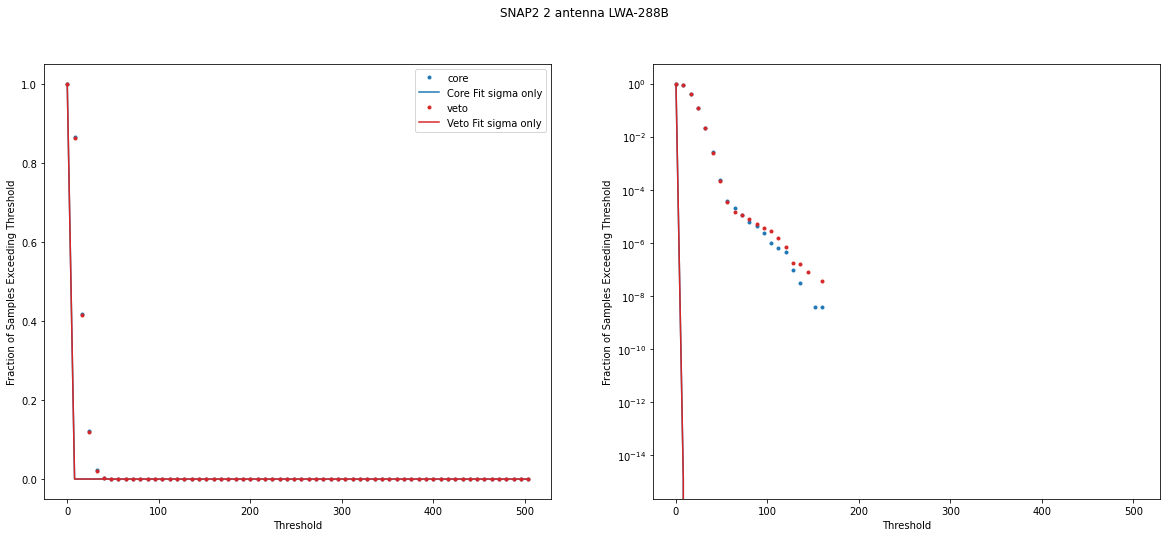

LWA-284A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


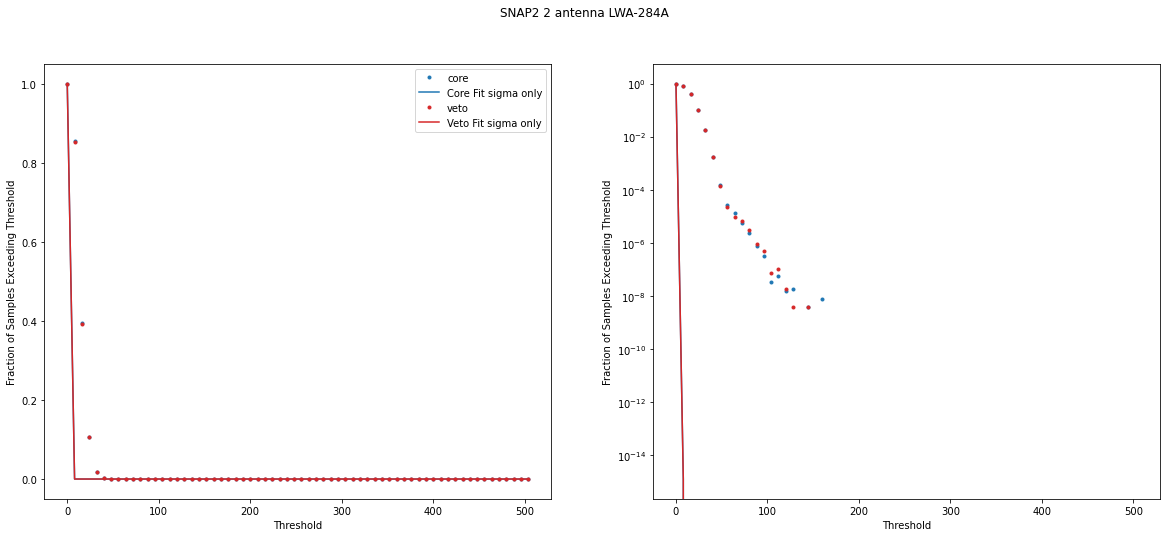

LWA-284B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


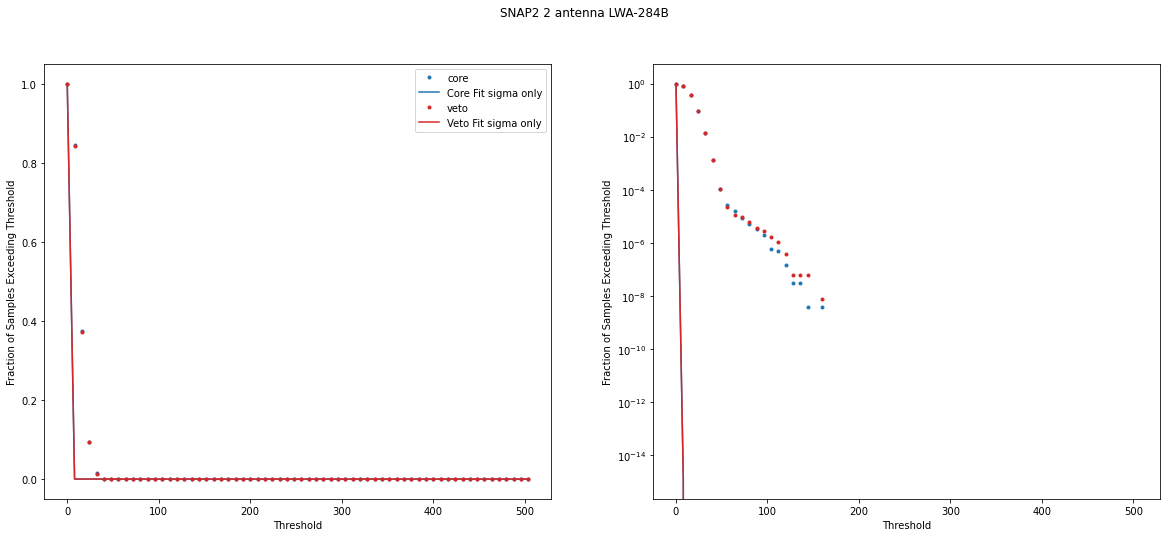

LWA-292A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


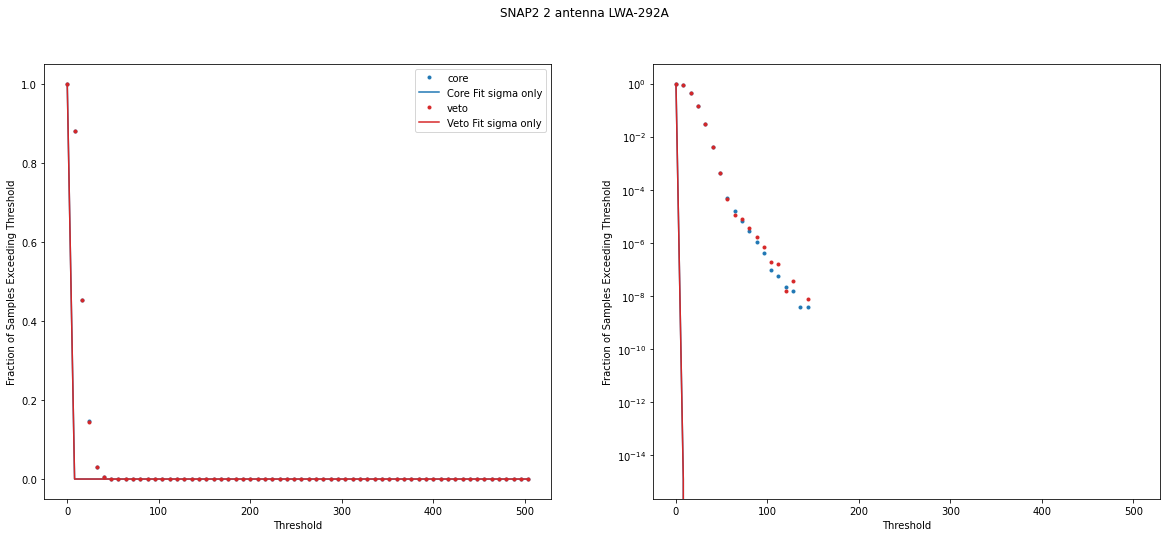

LWA-292B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


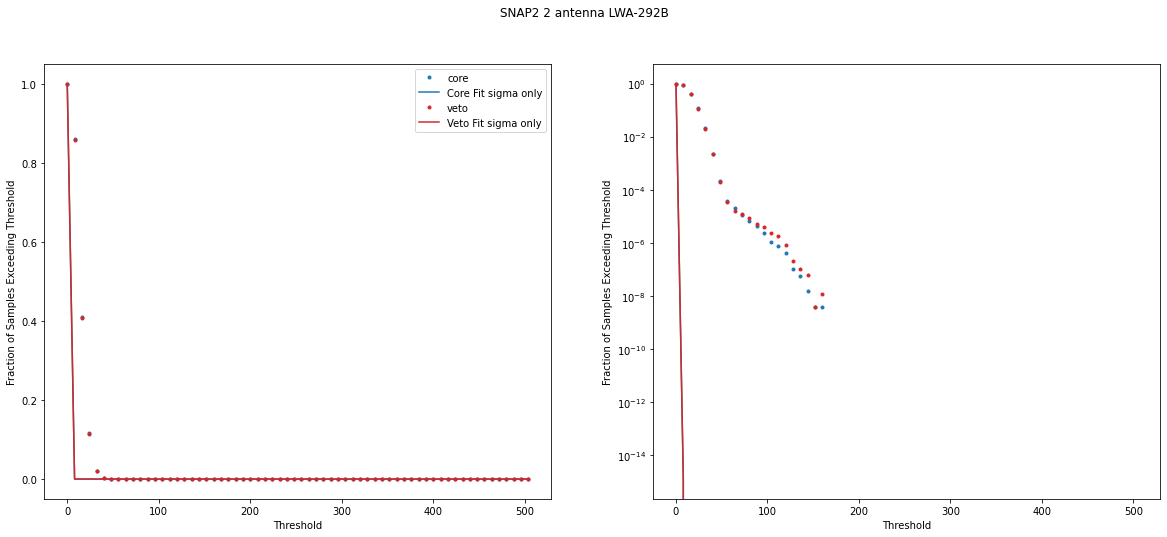

LWA-291A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


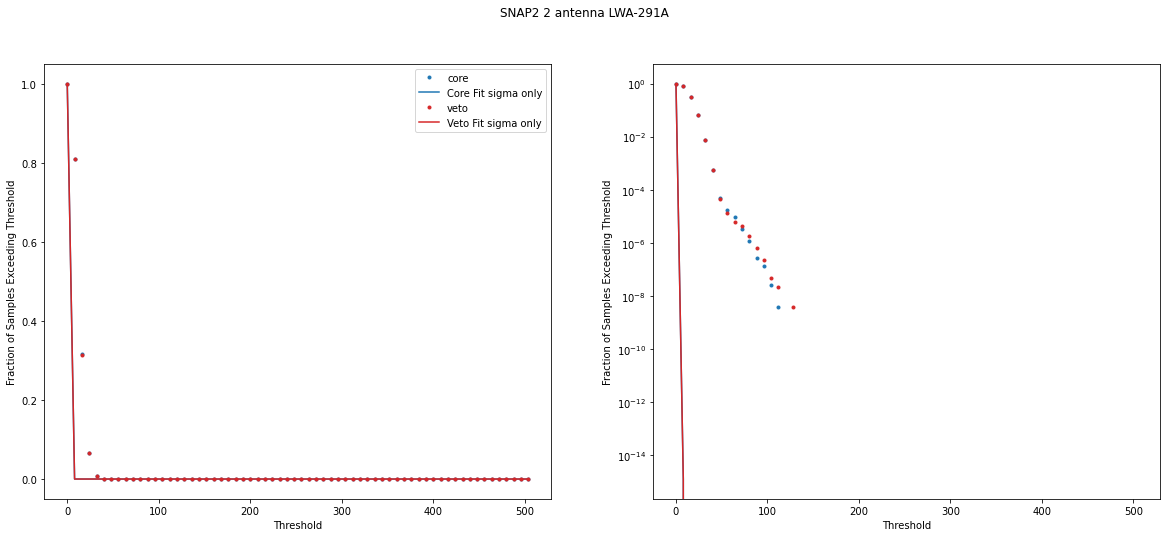

LWA-291B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


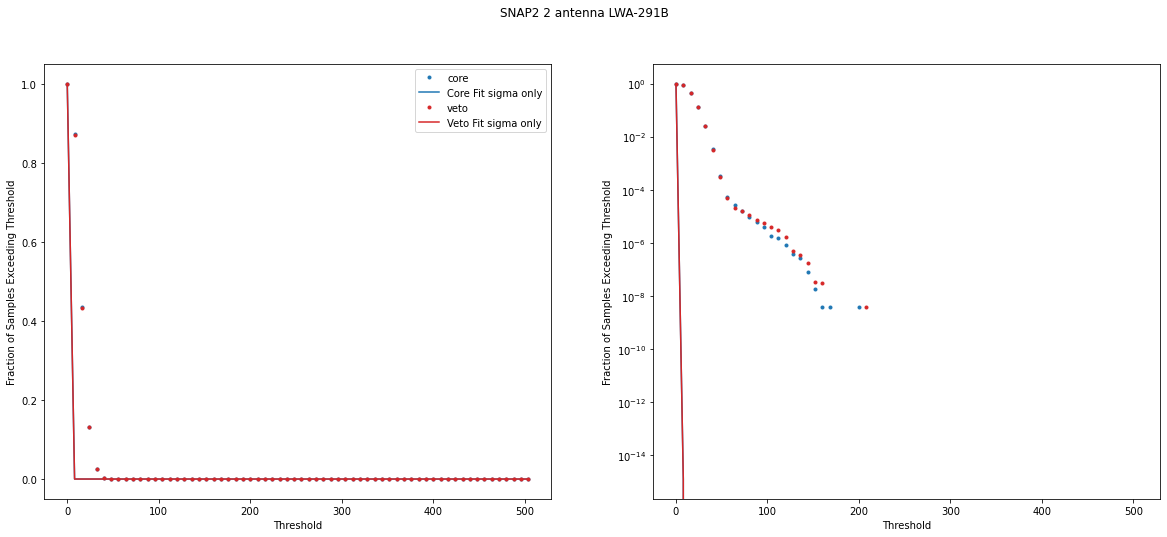

LWA-296A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


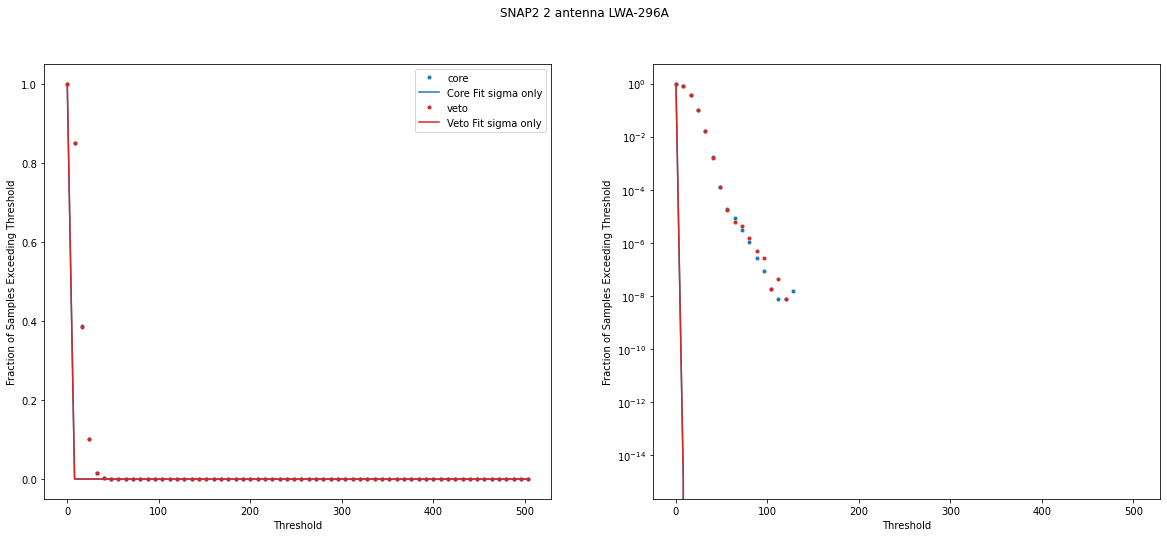

LWA-296B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


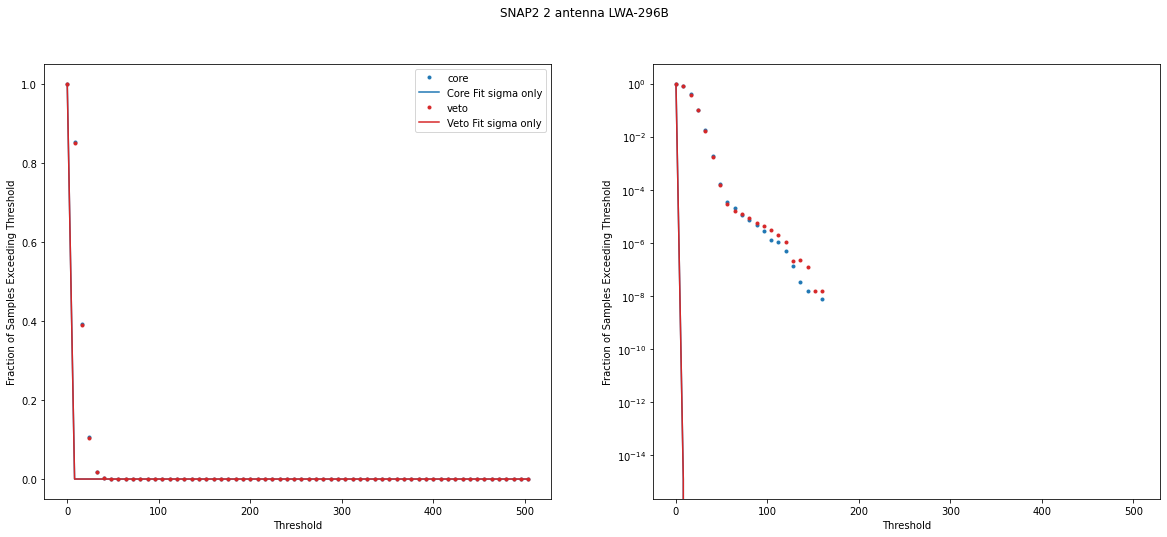

LWA-295A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


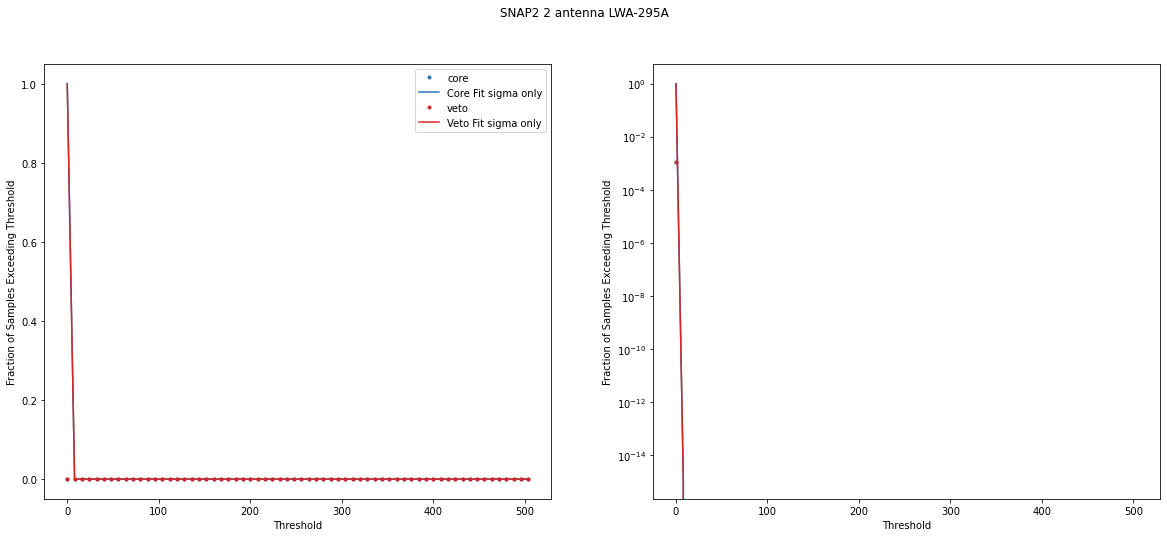

LWA-295B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


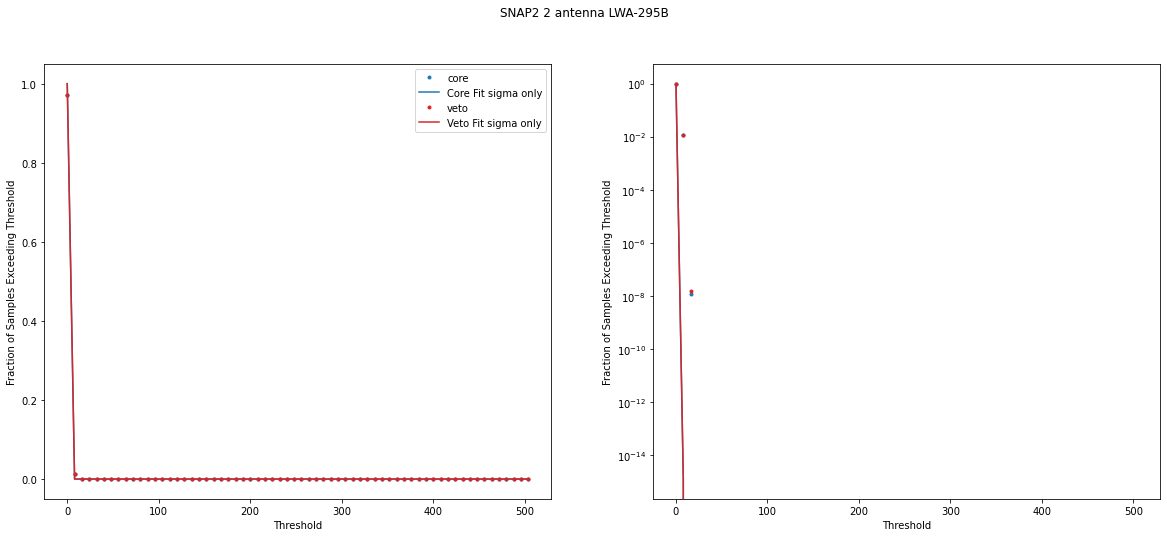

LWA-301A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


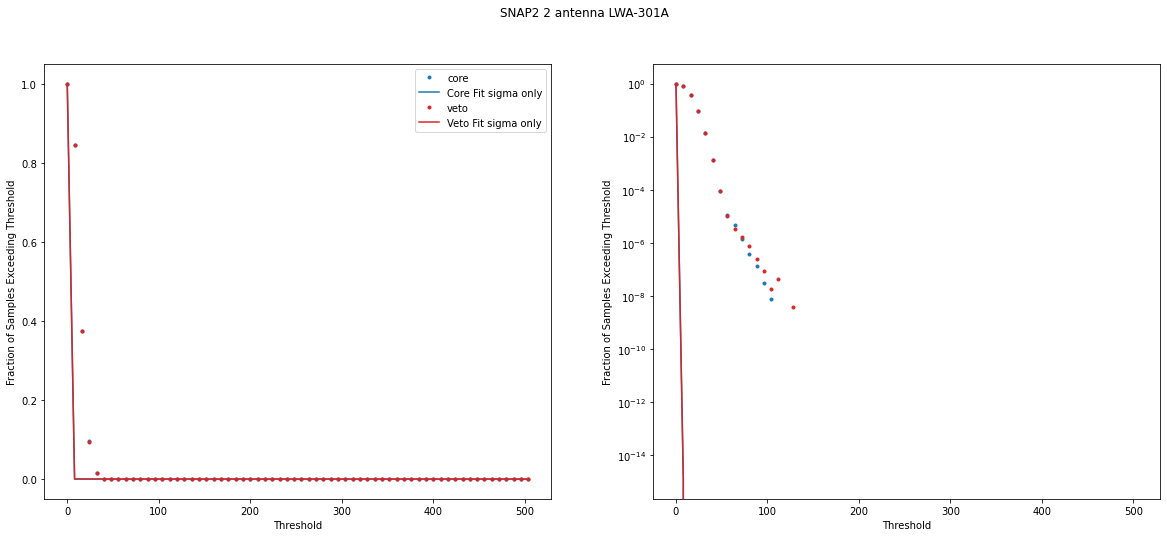

LWA-301B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


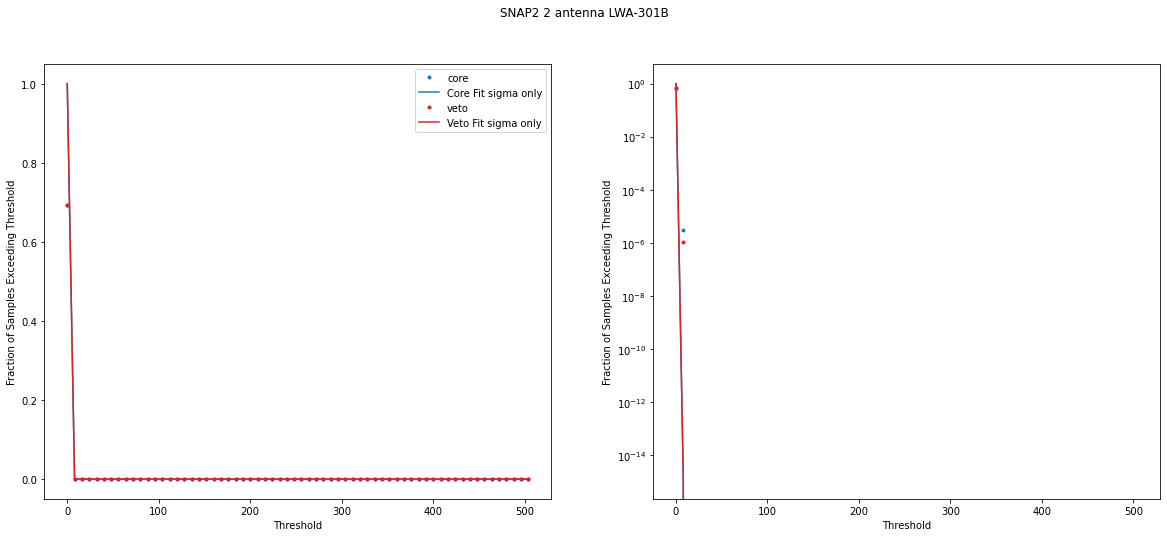

LWA-298A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


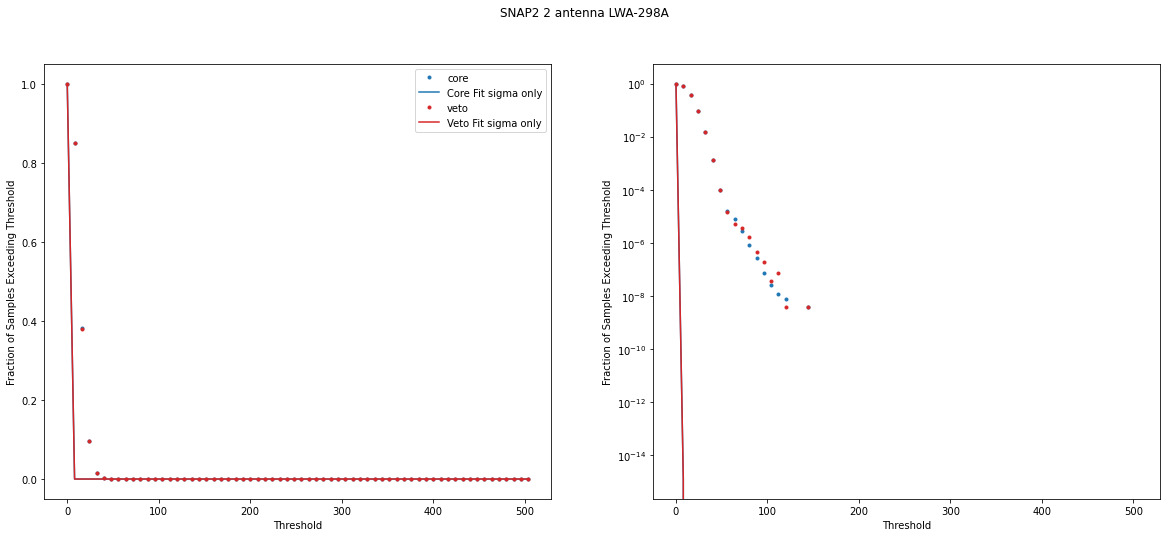

LWA-298B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


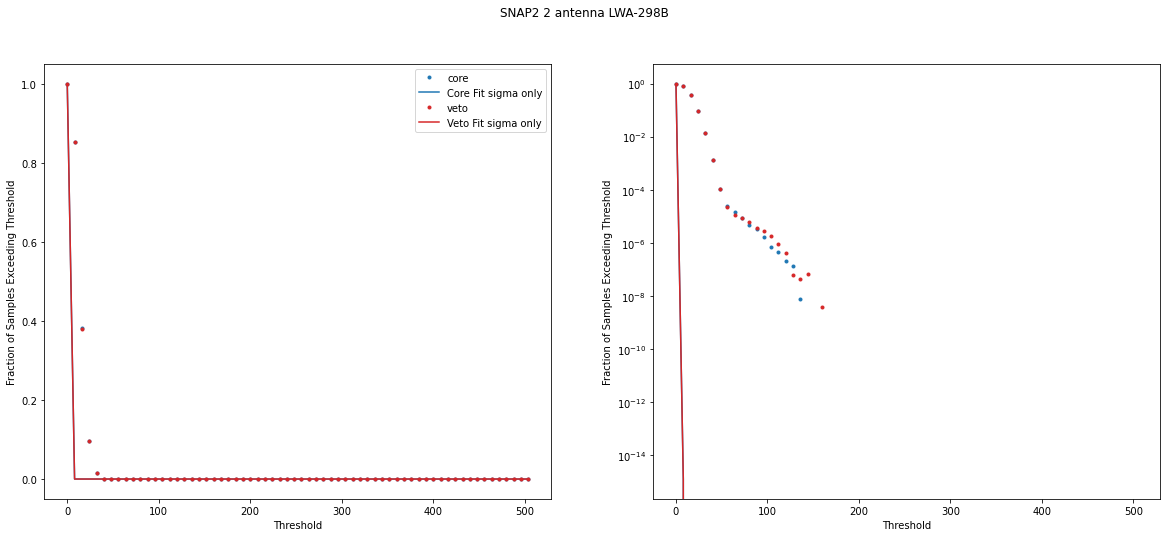

LWA-305A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


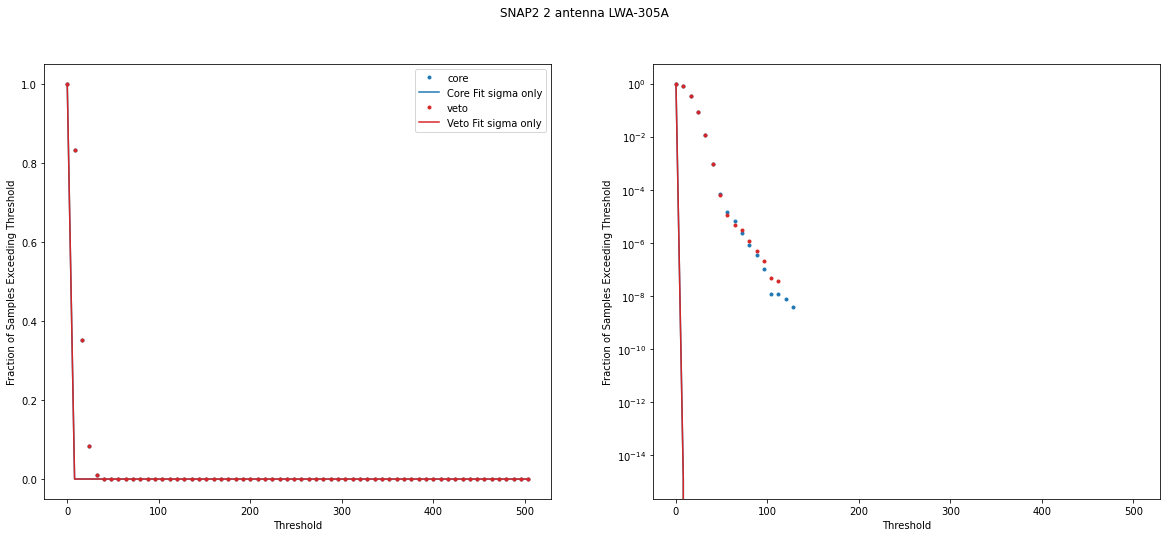

LWA-305B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


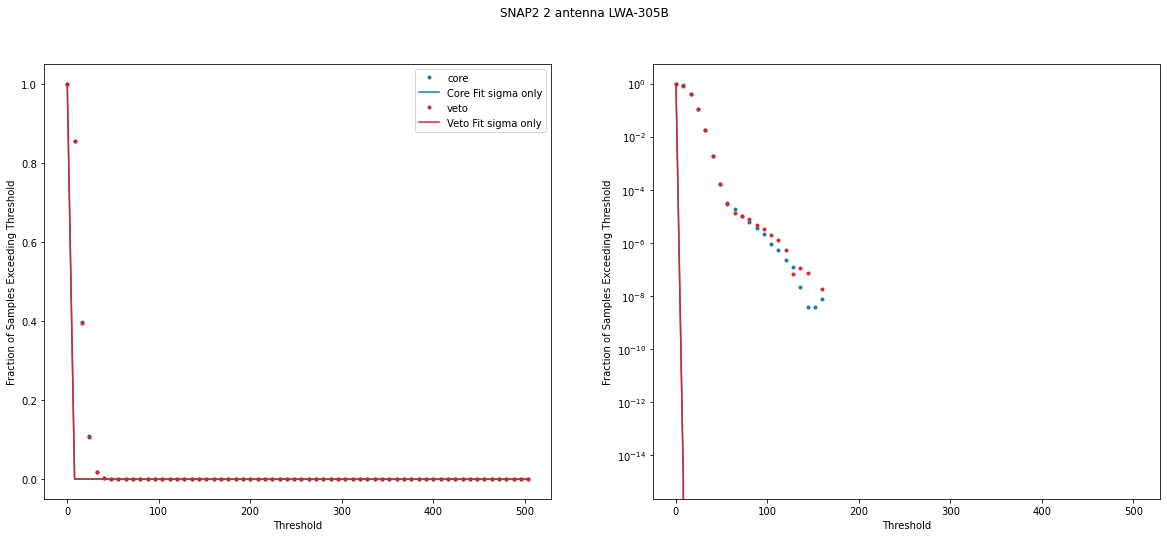

LWA-303A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


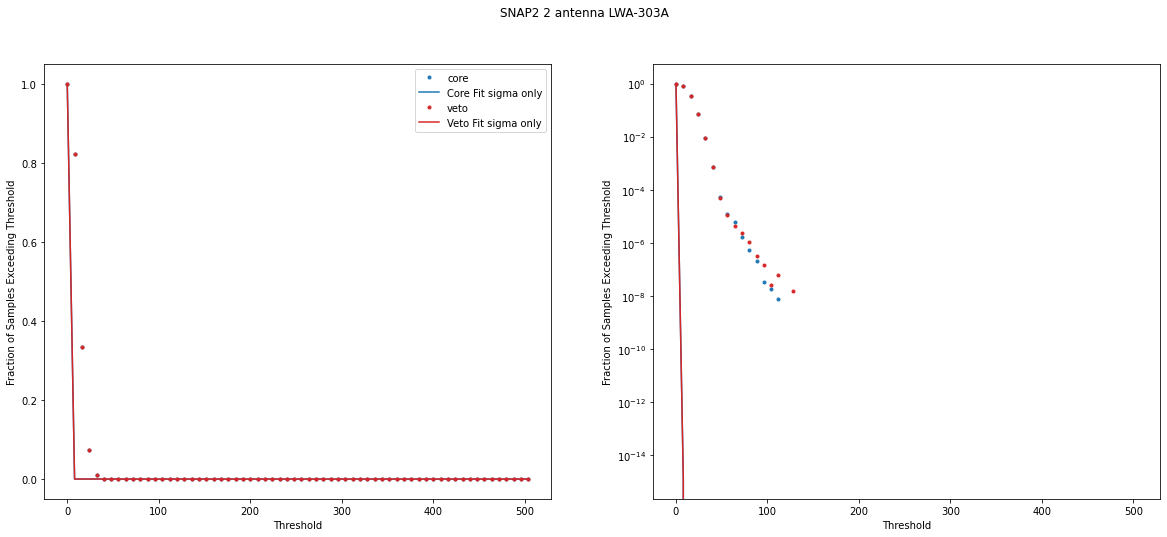

LWA-303B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


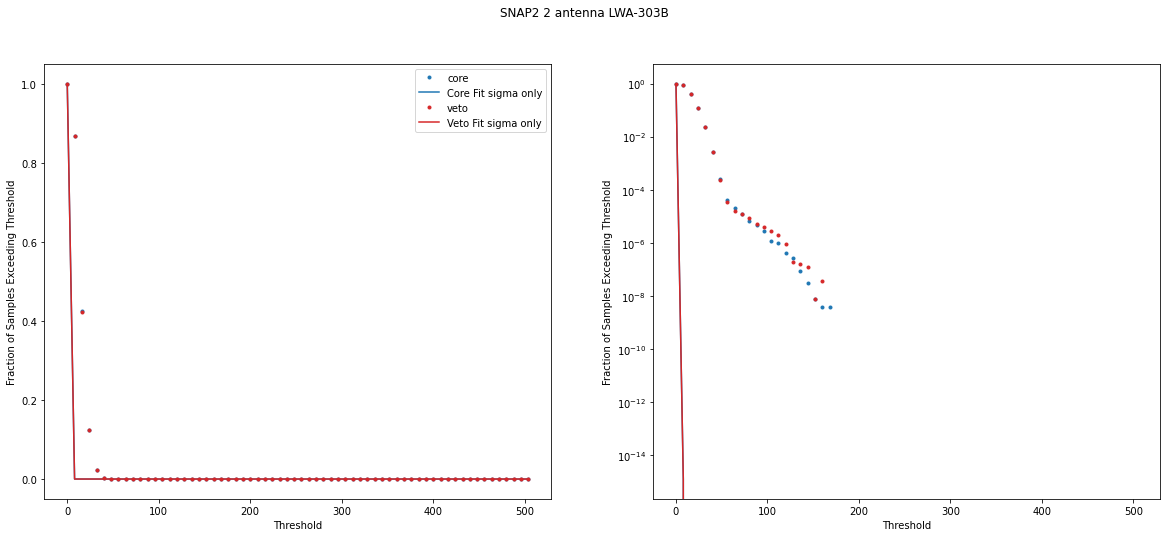

LWA-317A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


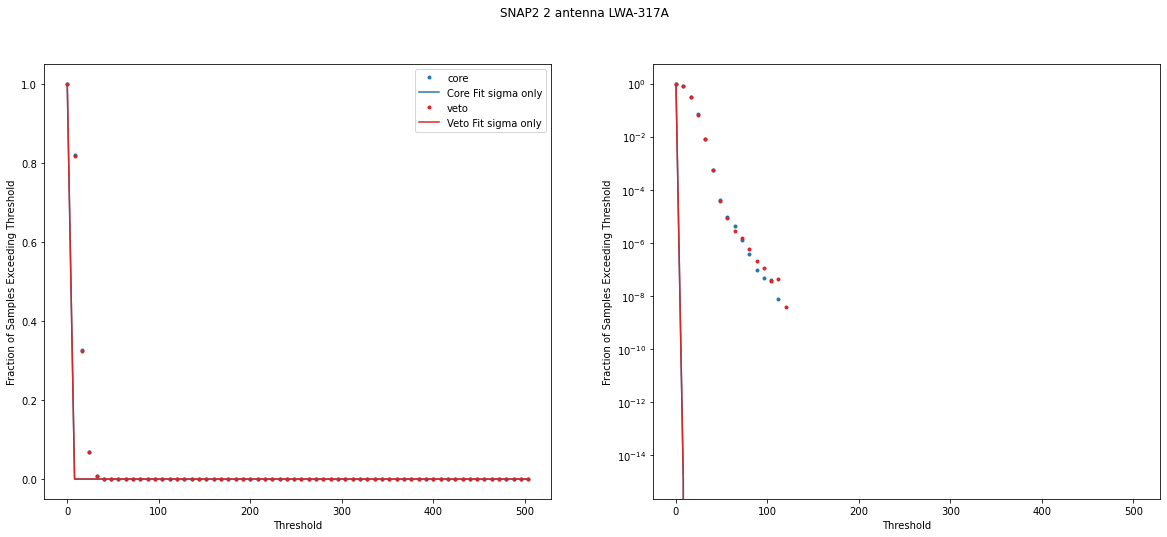

LWA-317B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


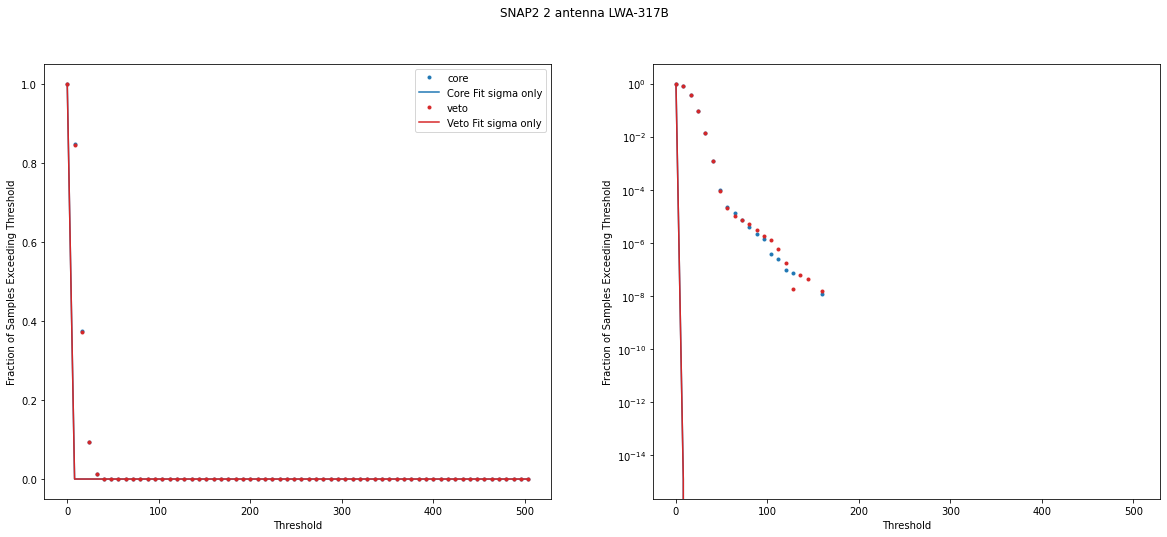

LWA-306A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


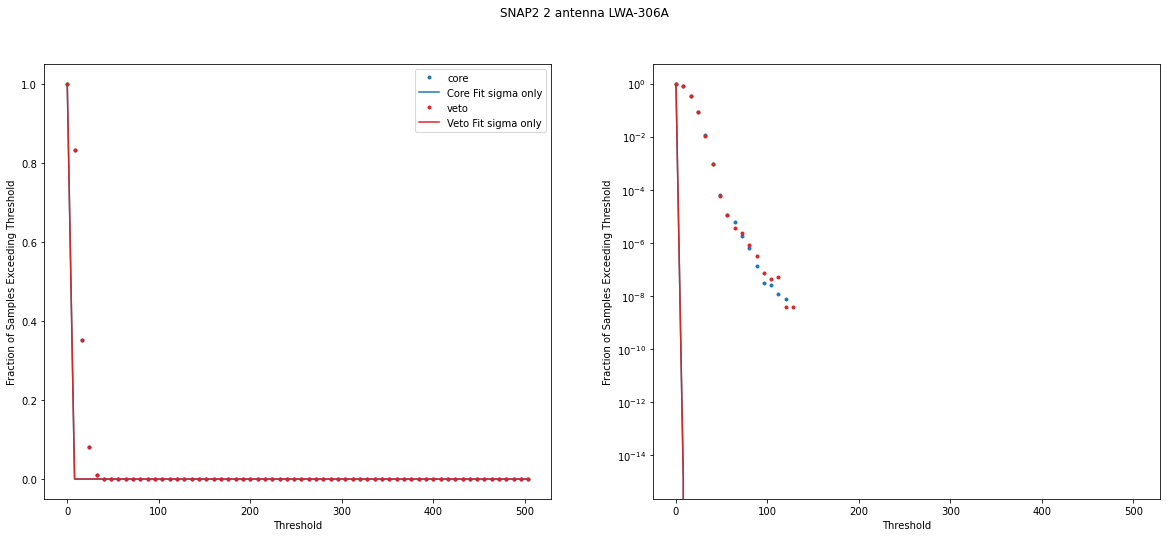

LWA-306B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


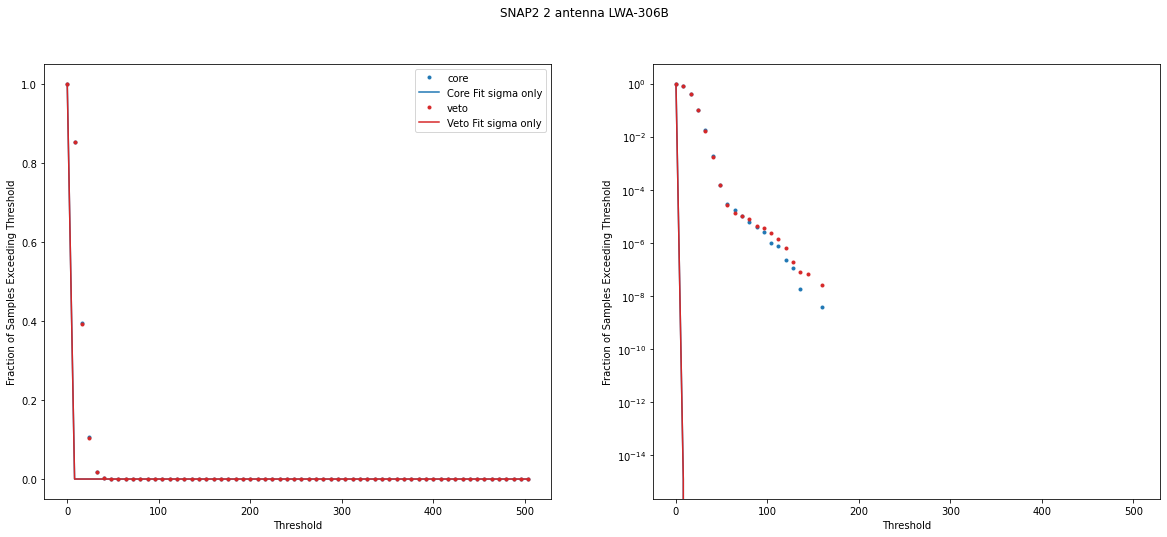

LWA-320A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


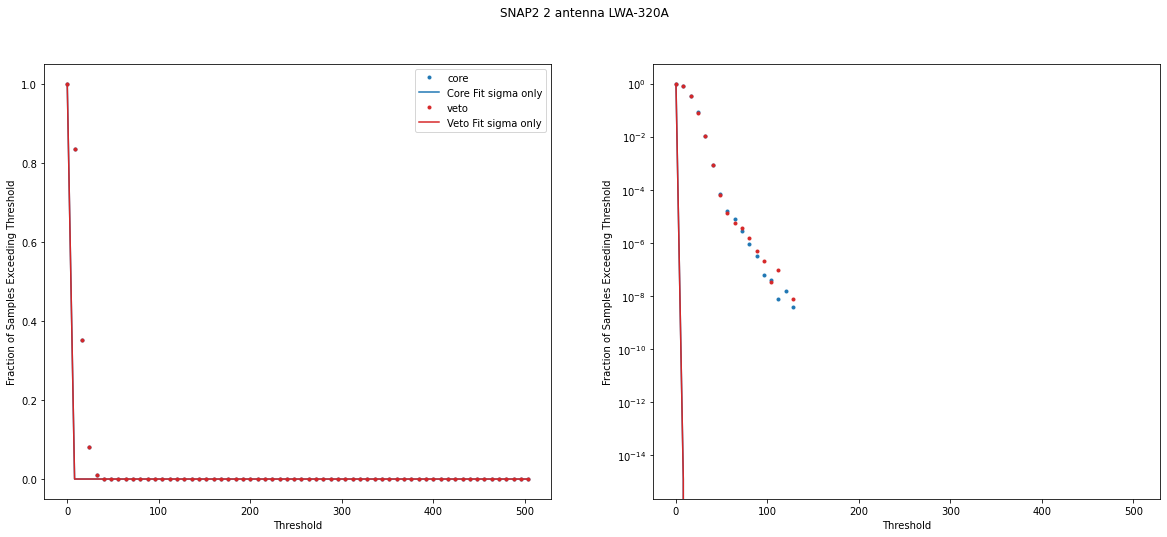

LWA-320B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


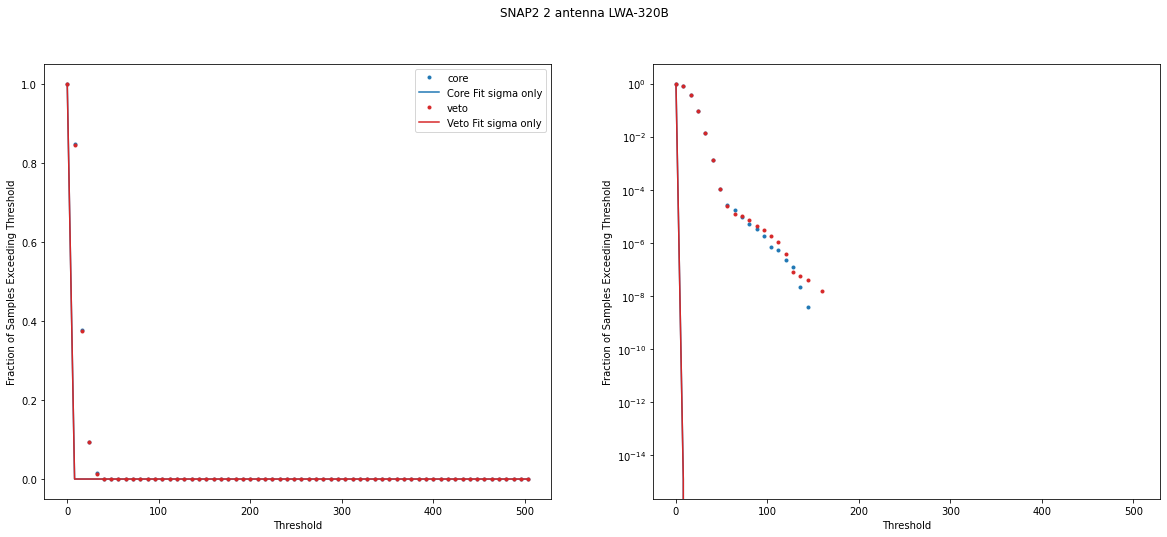

LWA-318A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


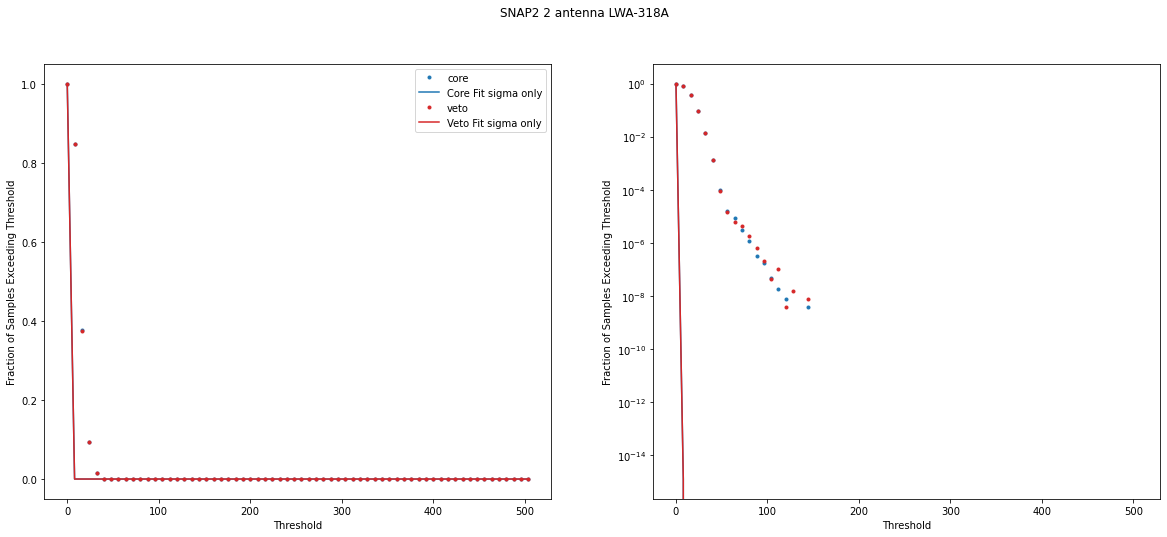

LWA-318B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


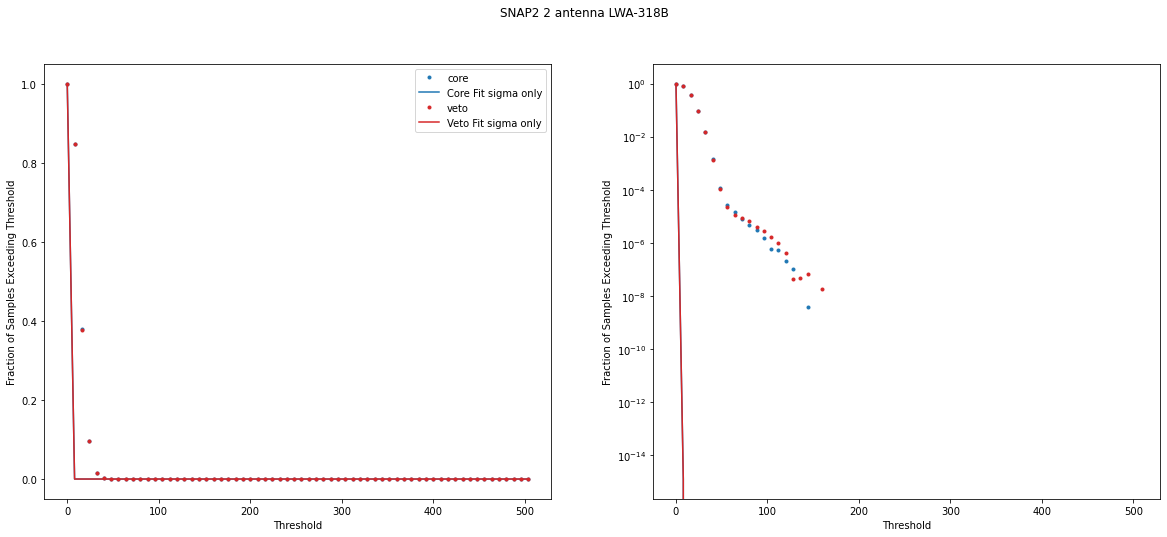

LWA-336A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


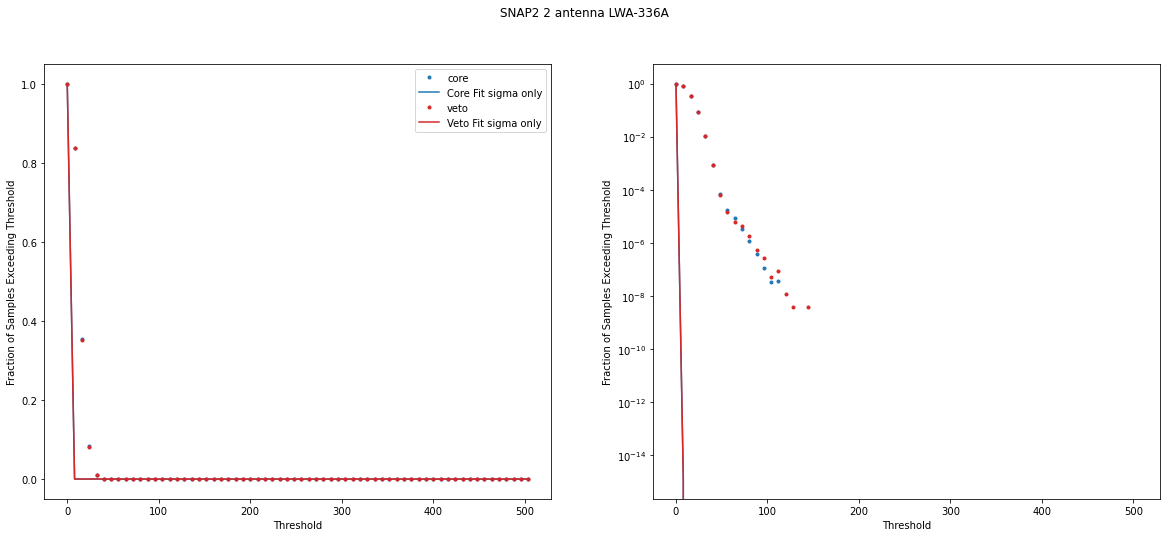

LWA-336B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


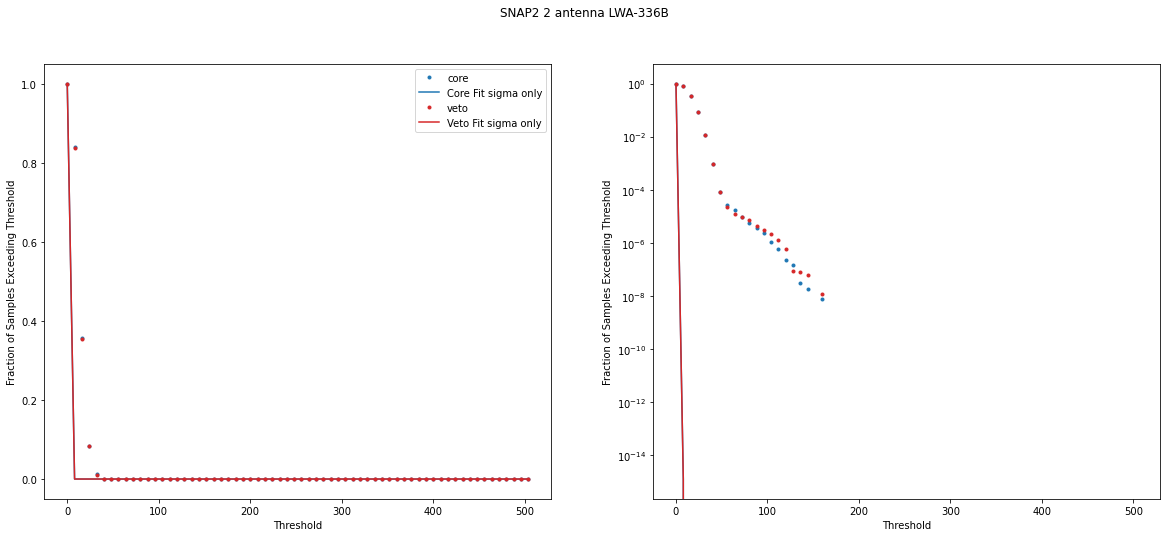

LWA-335A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


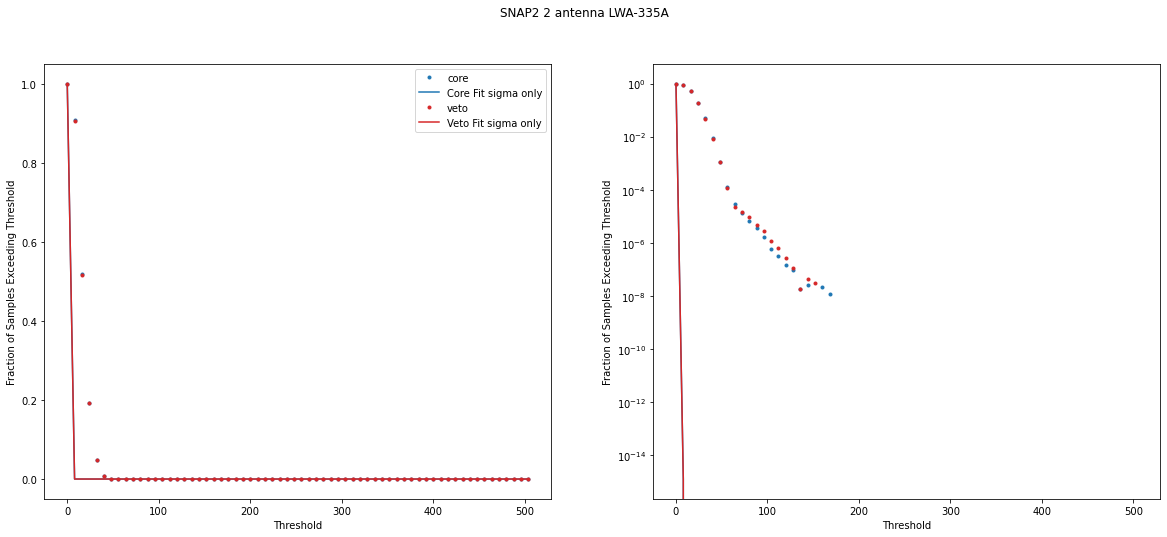

LWA-335B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


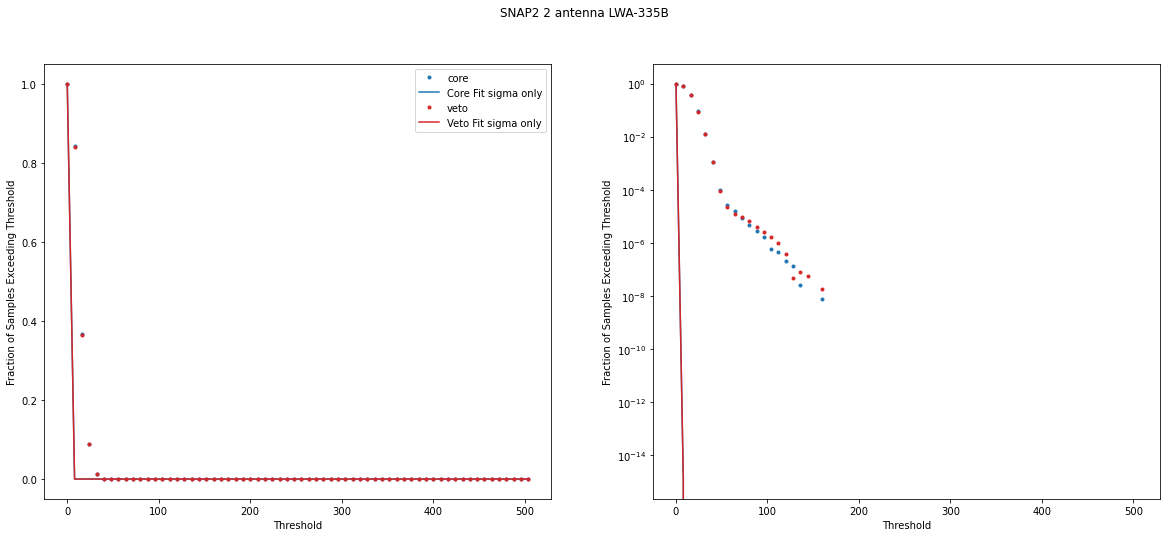

LWA-343A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


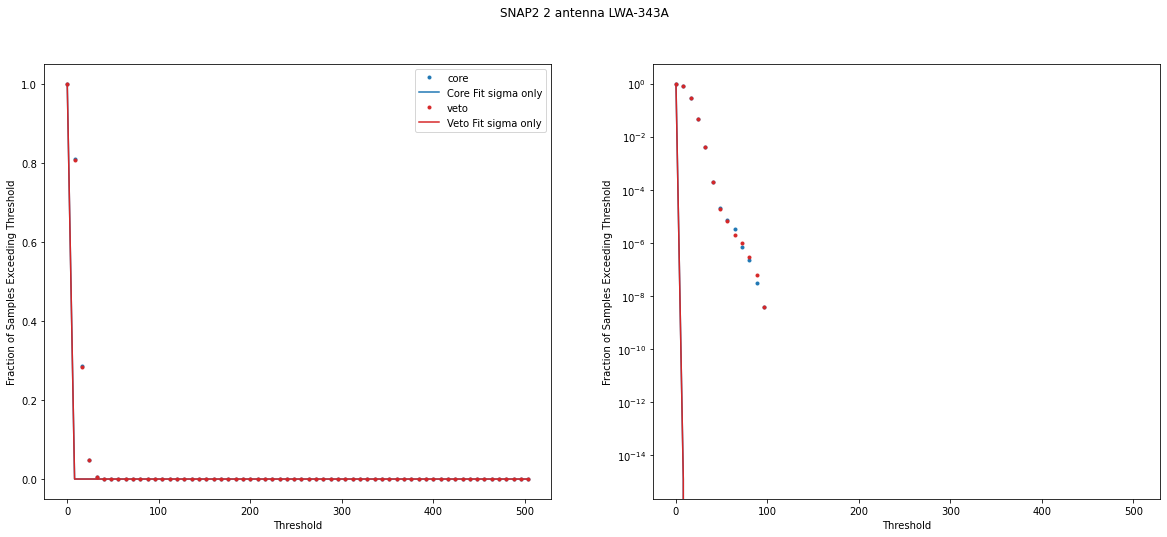

LWA-343B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


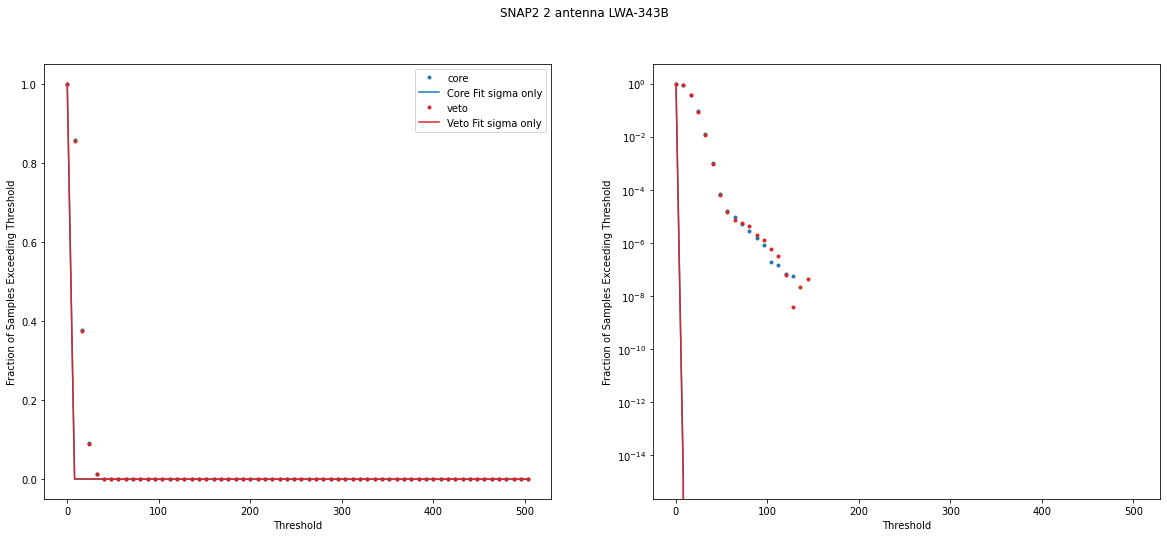

LWA-337A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


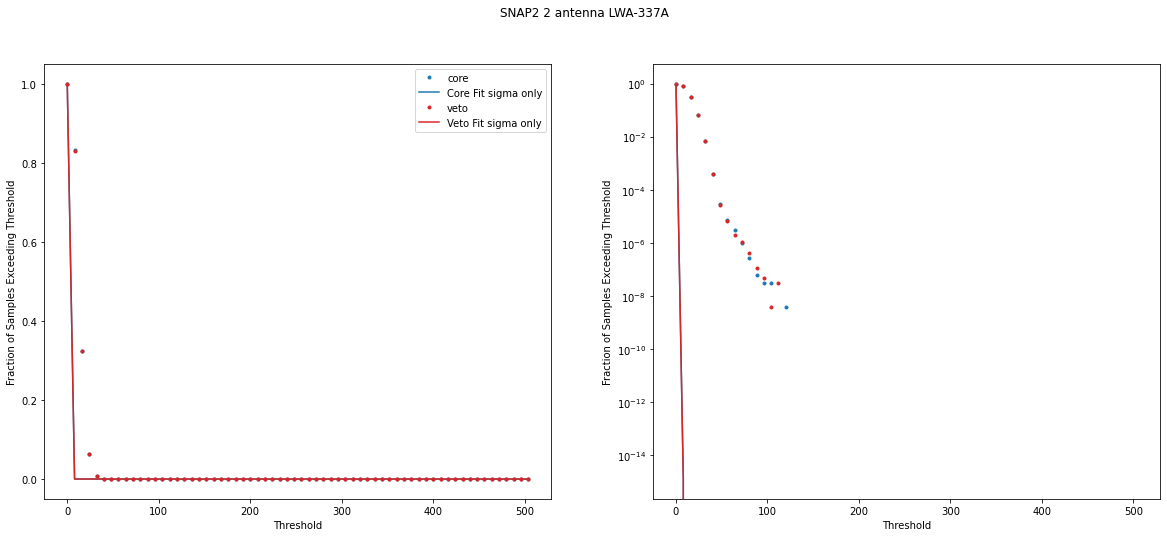

LWA-337B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


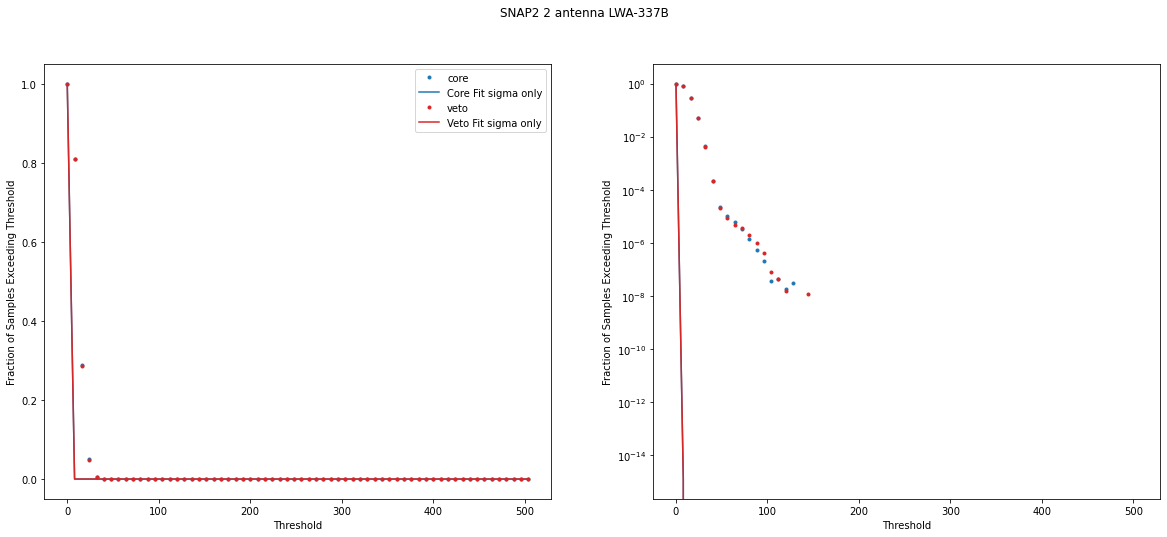

LWA-351A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


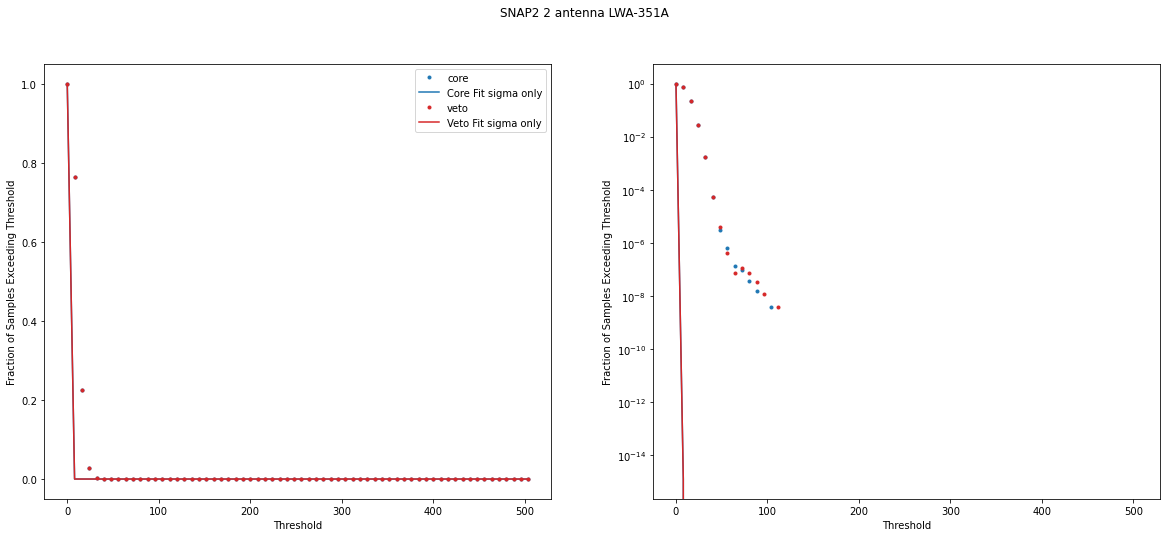

LWA-351B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


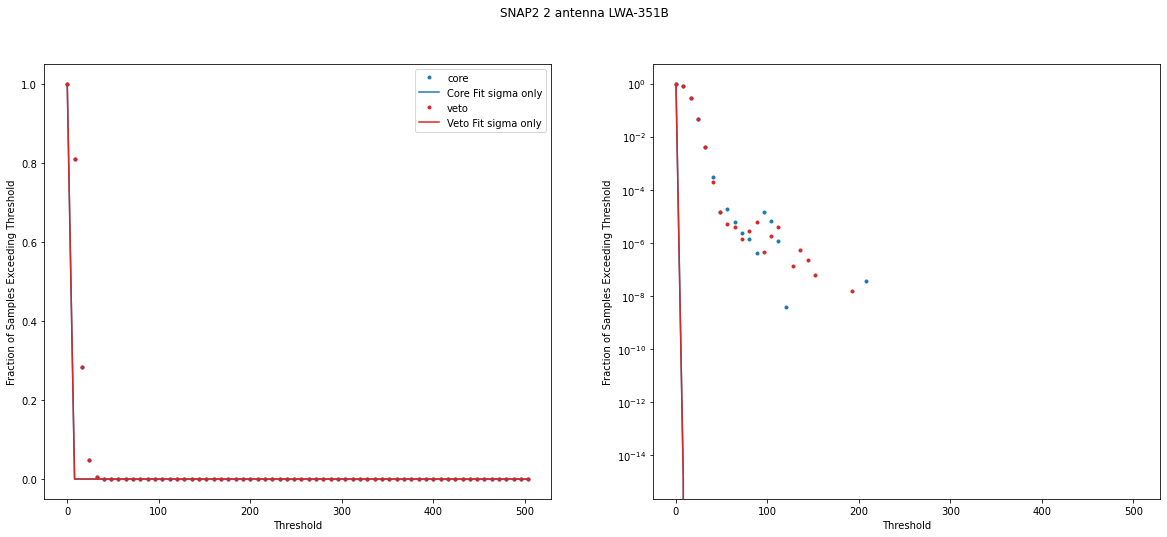

LWA-344A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


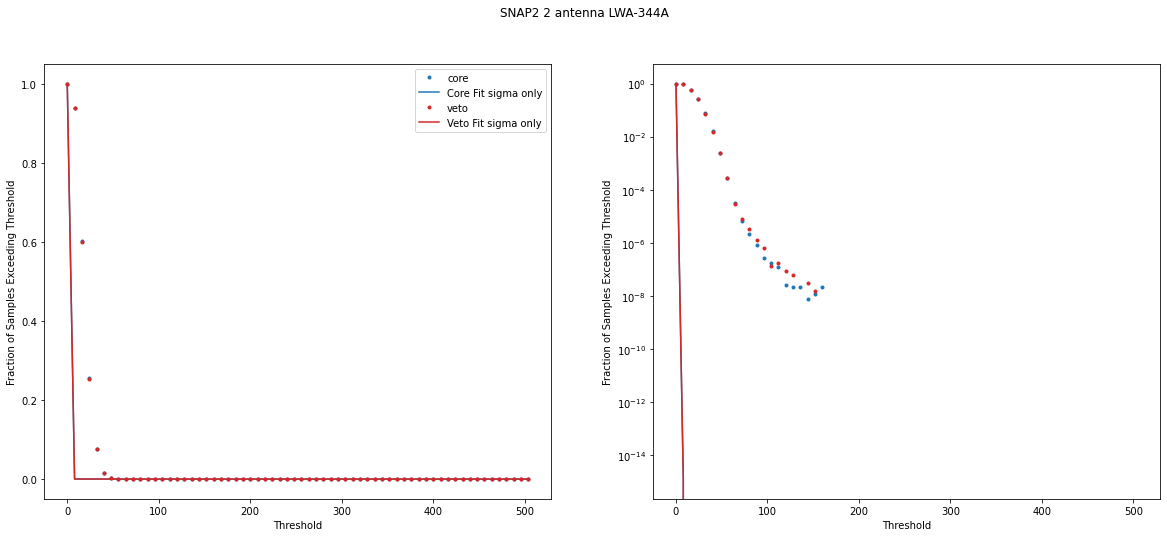

LWA-344B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


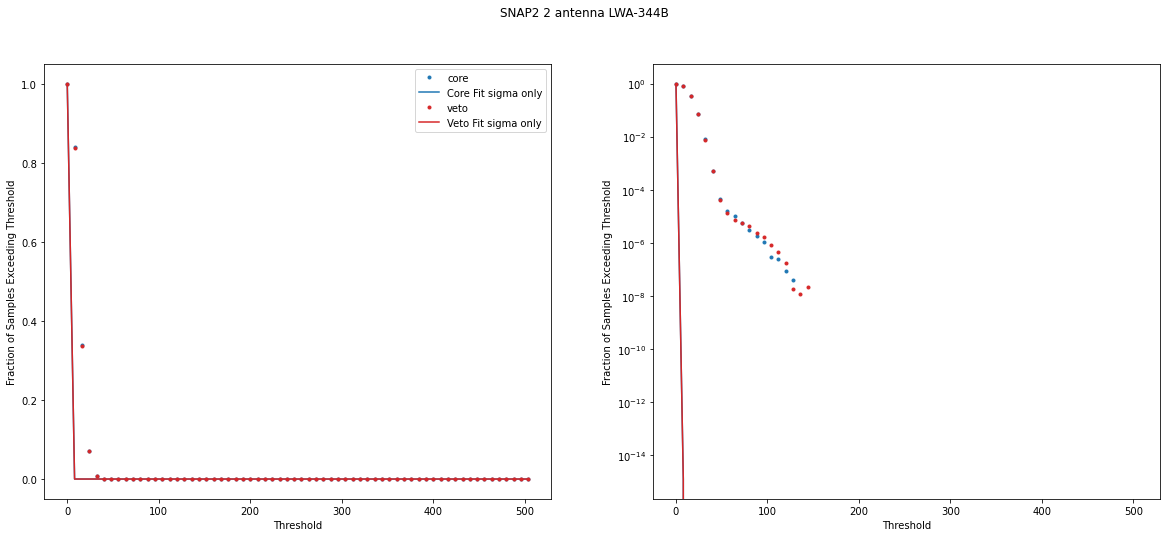

LWA-360A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


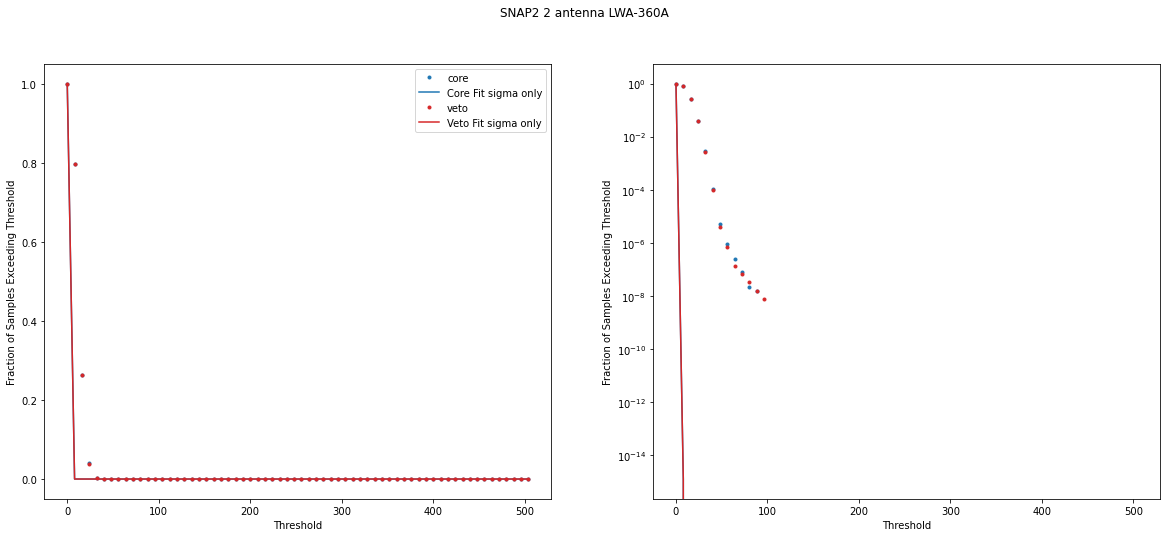

LWA-360B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


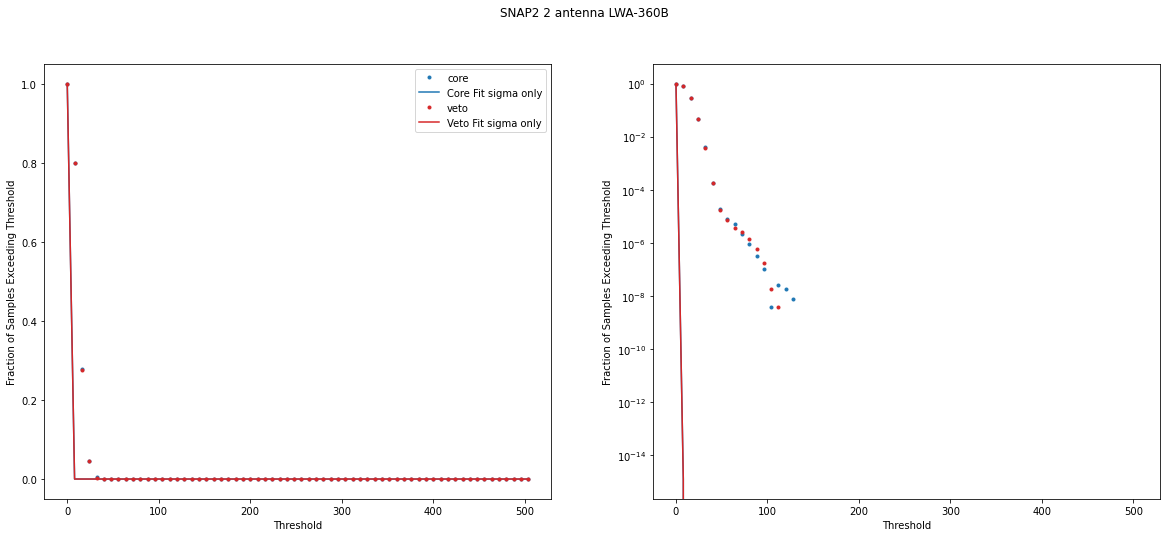

LWA-354A
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


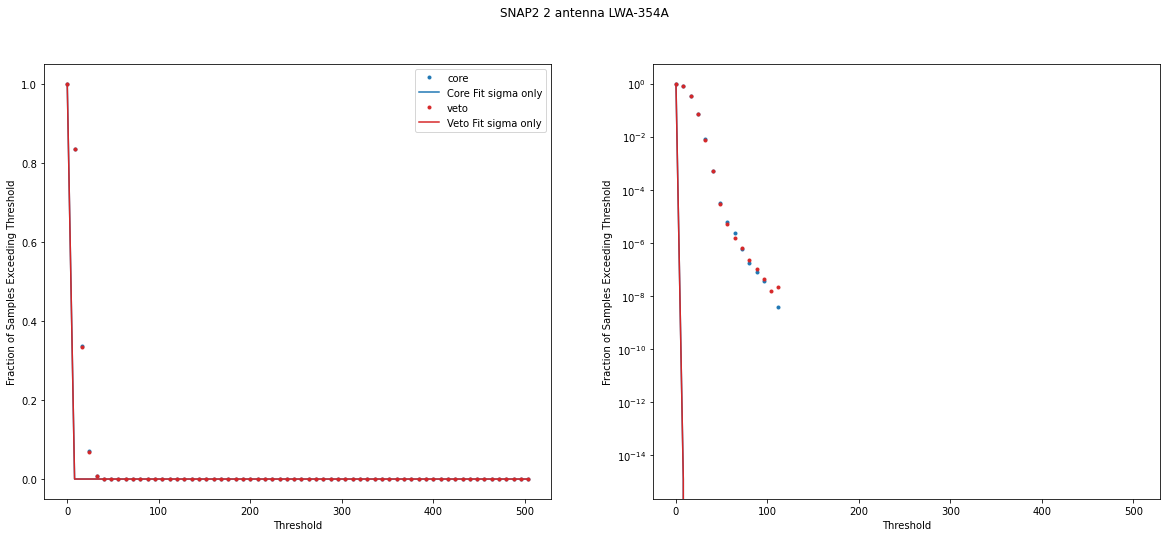

LWA-354B
Fit Core
[1.]
[[inf]]
Fit Veto
[1.]
[[inf]]


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


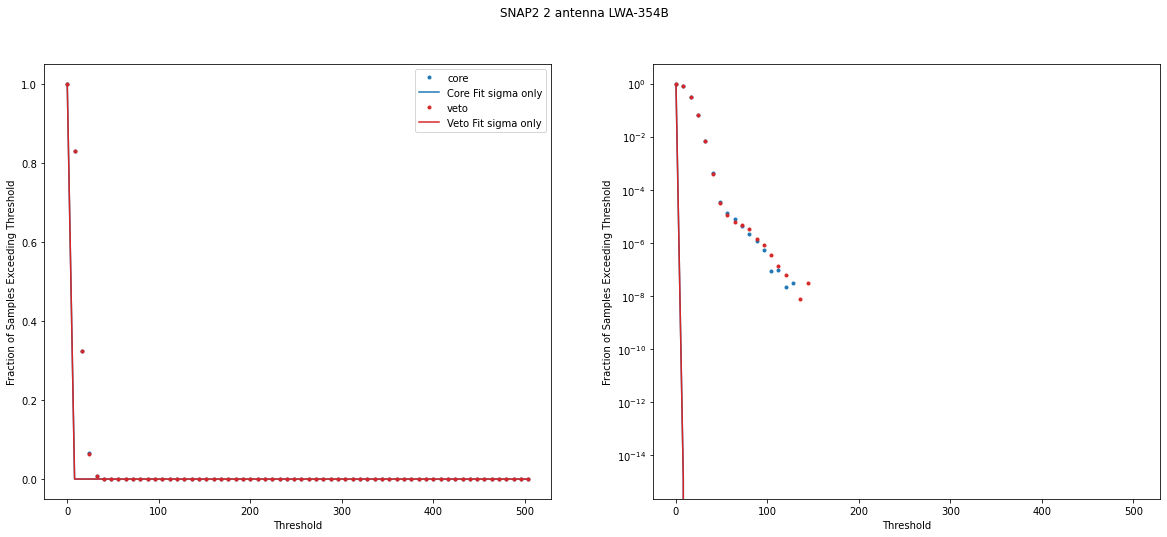

In [47]:

results_core=np.load(fnamec)
results_veto=np.load(fnamev)

def prob_simple(x,s):
    #fraction of samples whose absolute value iexceeds a threshold x if the sample is described by a Gaussian PDF with zero mean and variance s^2
    p = 1 - 0.5*(sp.erf((x)/((2**0.5)*s)) + sp.erf((x)/((2**0.5)*s)))
    return p

#snap051673764473.2053006results_c.npy

rate_core = results_core/(2**28 - 1)
rate_veto = results_veto/(2**28 - 1)

corefitsigmas = np.zeros((64,11))
corefitsigmaerrs = np.zeros((64,11))
vetofitsigmas = np.zeros((64,11))
vetofitsigmaerrs = np.zeros((64,11))

for b in [2]: #list boards to make the plot for. b is the one-indexed snap number (i.e. it can be 1-11 inclusive)
    plt.suptitle('SNAP2 '+str(b))
    for a in range(64):
        antname=mapping.snap2_to_antpol(b,a)
        print(antname)
        print("Fit Core")
        popt1,pcov1 = oz.curve_fit(prob_simple,thresholds,rate_core[a,:,b])
        corefitsigmas[a]=popt1[0]
        corefitsigmaerrs[a]=pcov1[0]
        print(popt1)
        print(pcov1)

        print("Fit Veto")
        popt2,pcov2 = oz.curve_fit(prob_simple,thresholds,np.flip(rate_veto[a,:,b]))
        vetofitsigmas[a]=popt2[0]
        vetofitsigmaerrs[a]=pcov2[0]
        print(popt2)
        print(pcov2)

        model1 = prob_simple(thresholds,popt1[0])
        model2 = prob_simple(thresholds,popt2[0])

        plt.figure(figsize=(20,8))
        plt.suptitle('SNAP2 '+str(b)+' antenna ' +antname)

        plt.subplot(121)
        plt.xlabel("Threshold")
        plt.ylabel("Fraction of Samples Exceeding Threshold")
        plt.plot(thresholds,rate_core[a,:,b],'C0.',label='core')
        plt.plot(thresholds,model1,'C0-',label="Core Fit sigma only")

        plt.plot(np.flip(thresholds),rate_veto[a,:,b],'C3.',label='veto')
        plt.plot(thresholds,model2,'C3-',label="Veto Fit sigma only")

        plt.legend()

        plt.subplot(122)
        plt.xlabel("Threshold")
        plt.ylabel("Fraction of Samples Exceeding Threshold")
        plt.semilogy(thresholds,rate_core[a,:,b],'C0.',label='core')
        plt.semilogy(thresholds,model1,'C0-',label="Core Fit sigma only")

        plt.semilogy(np.flip(thresholds),rate_veto[a,:,b],'C3.',label='veto')
        plt.semilogy(thresholds,model2,'C3-',label="Veto Fit sigma only")
        plt.show()

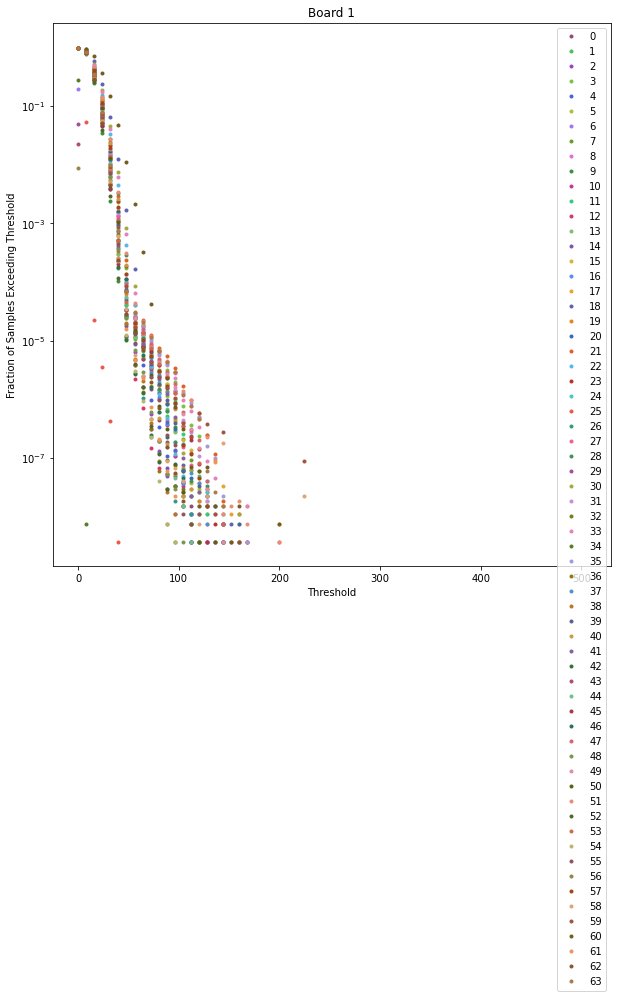

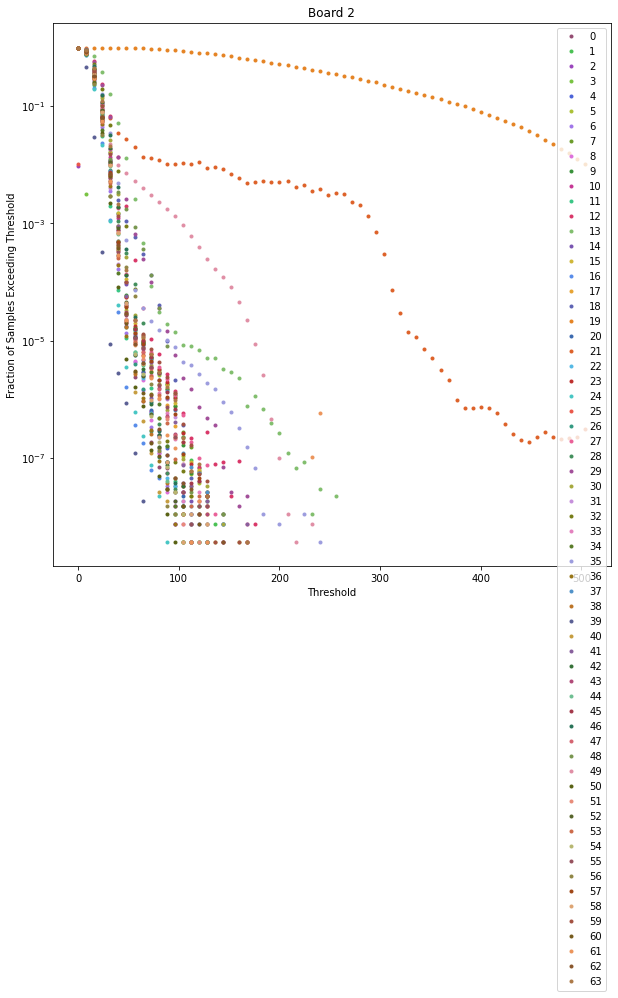

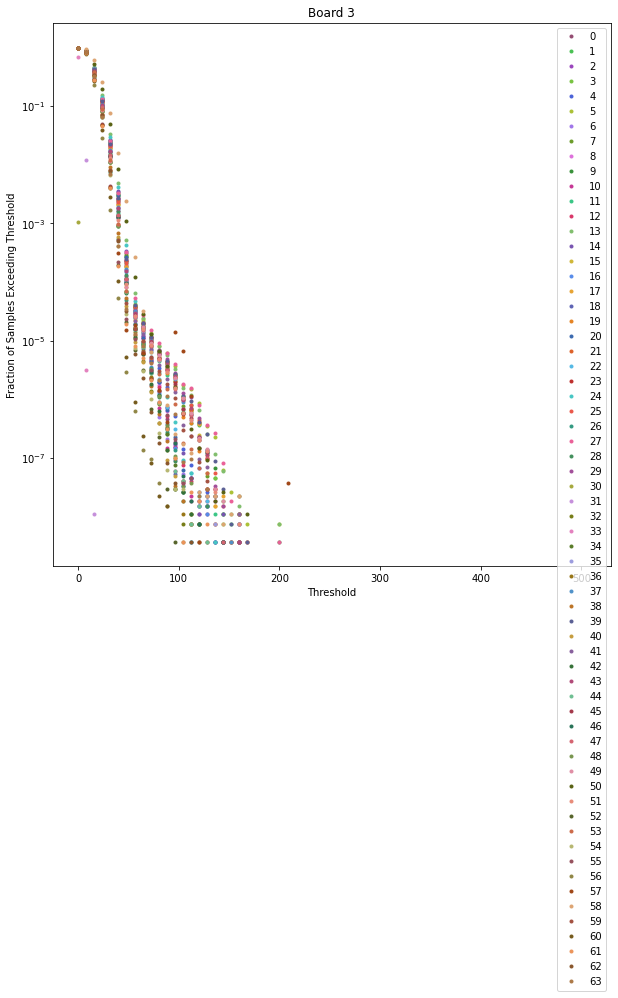

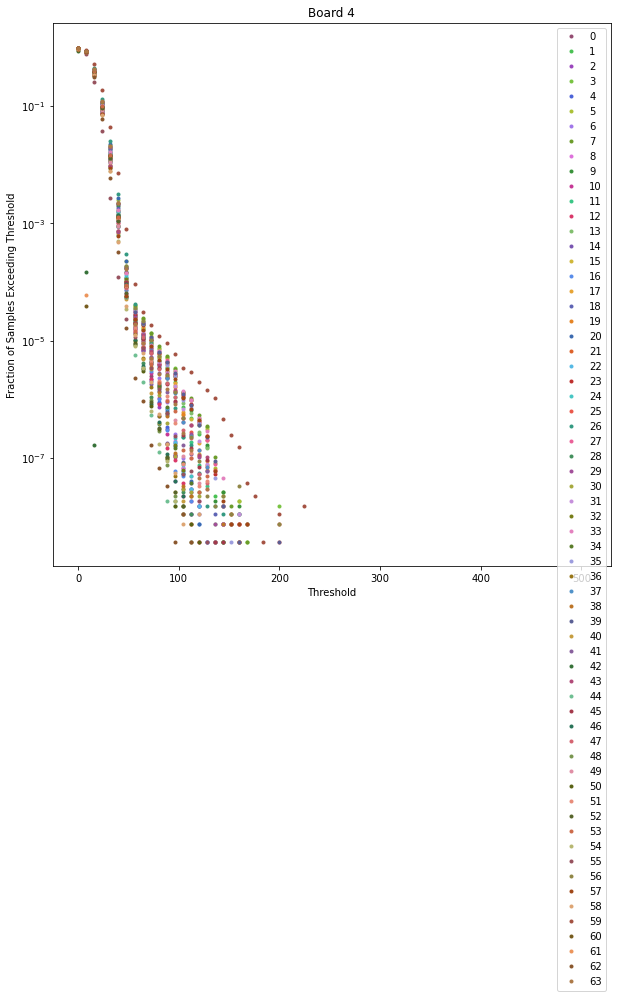

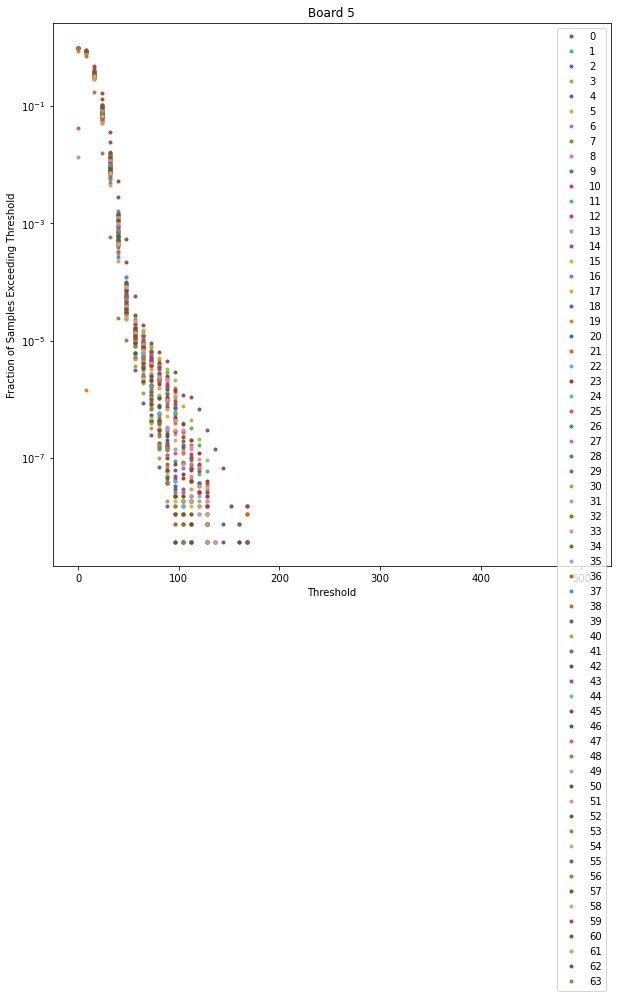

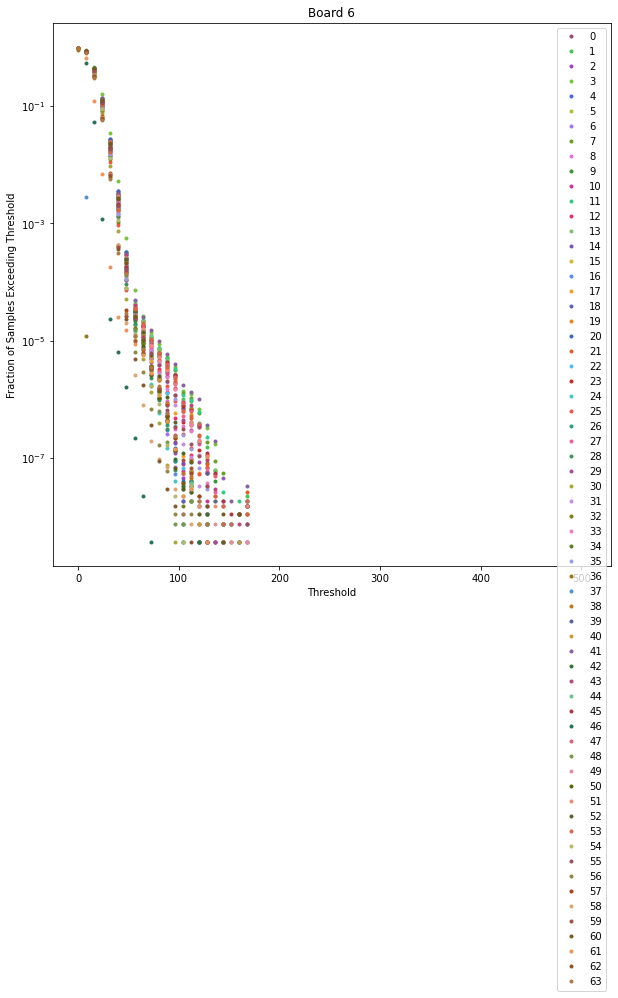

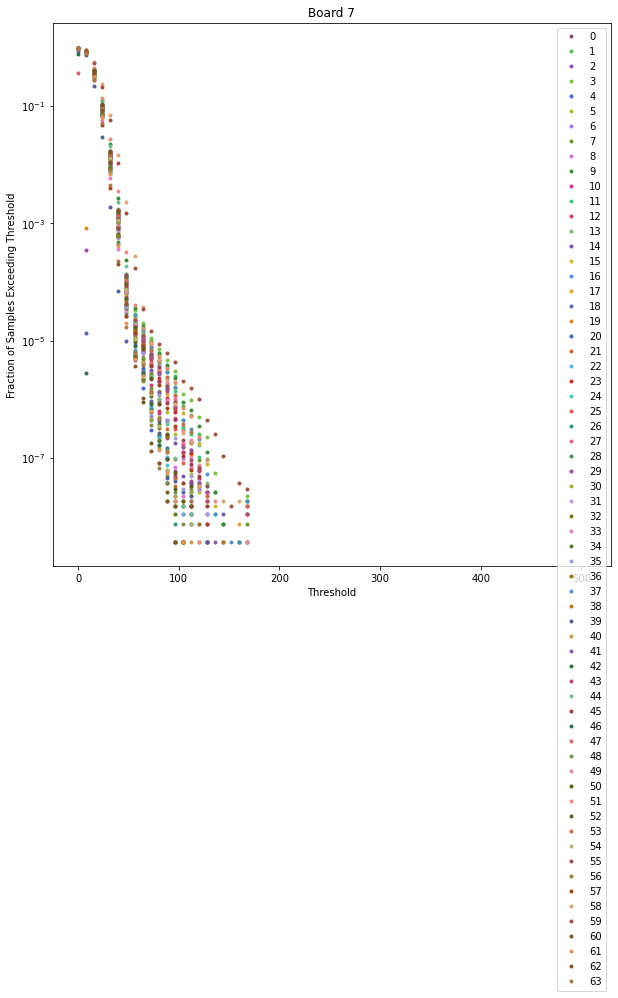

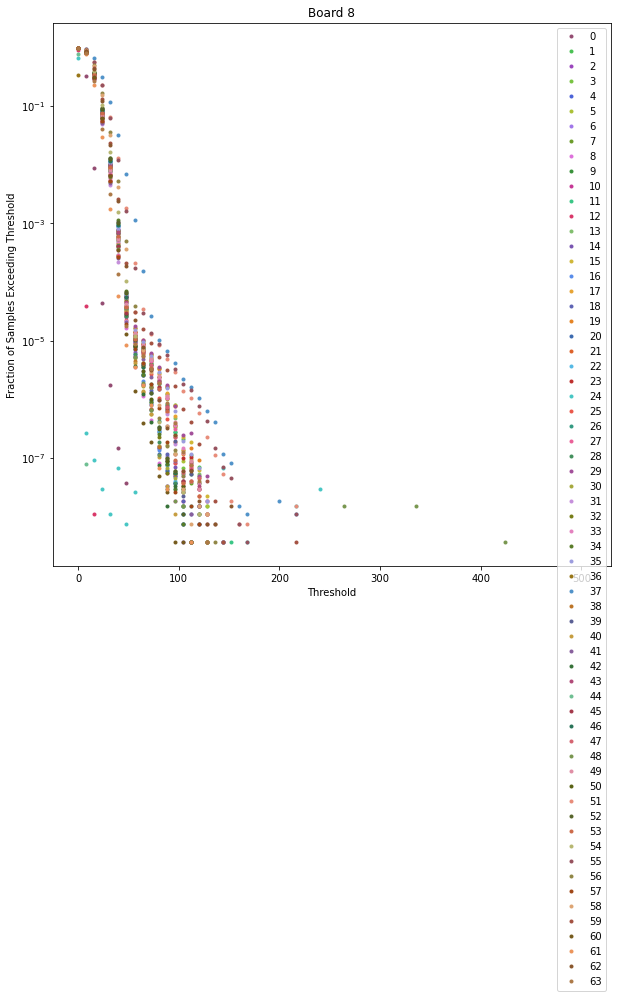

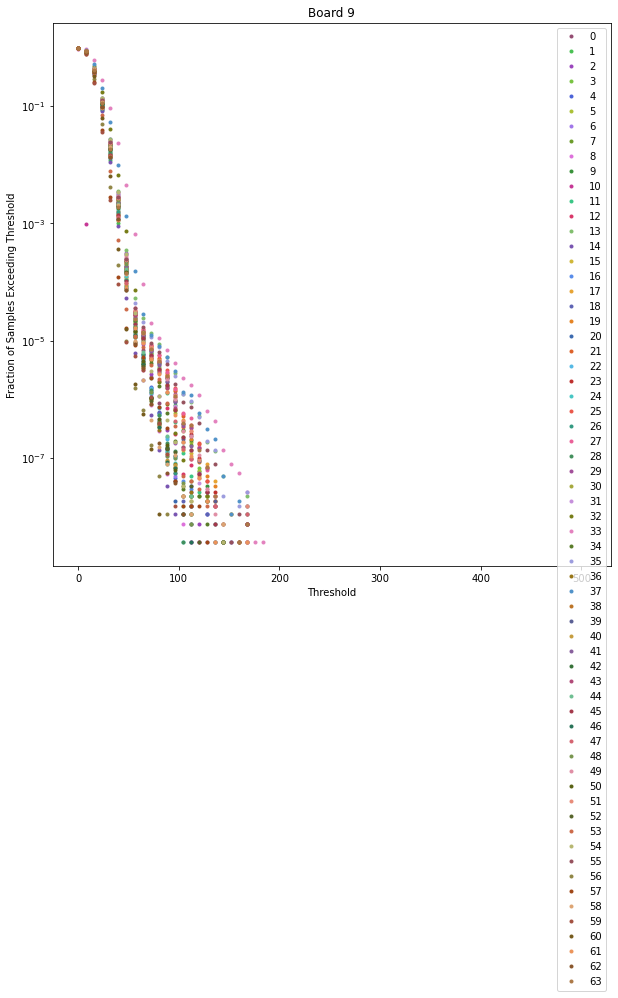

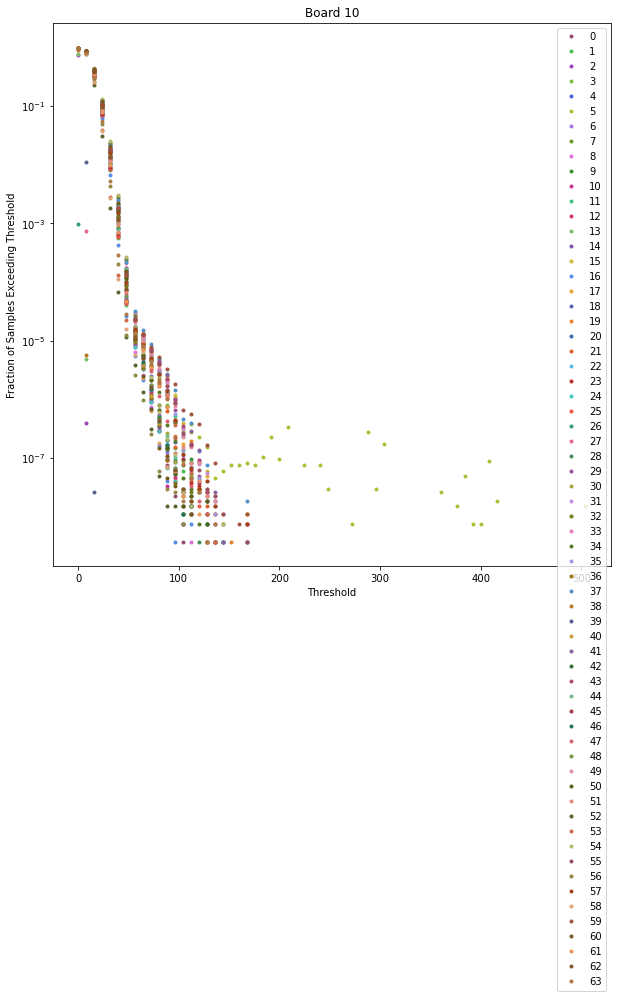

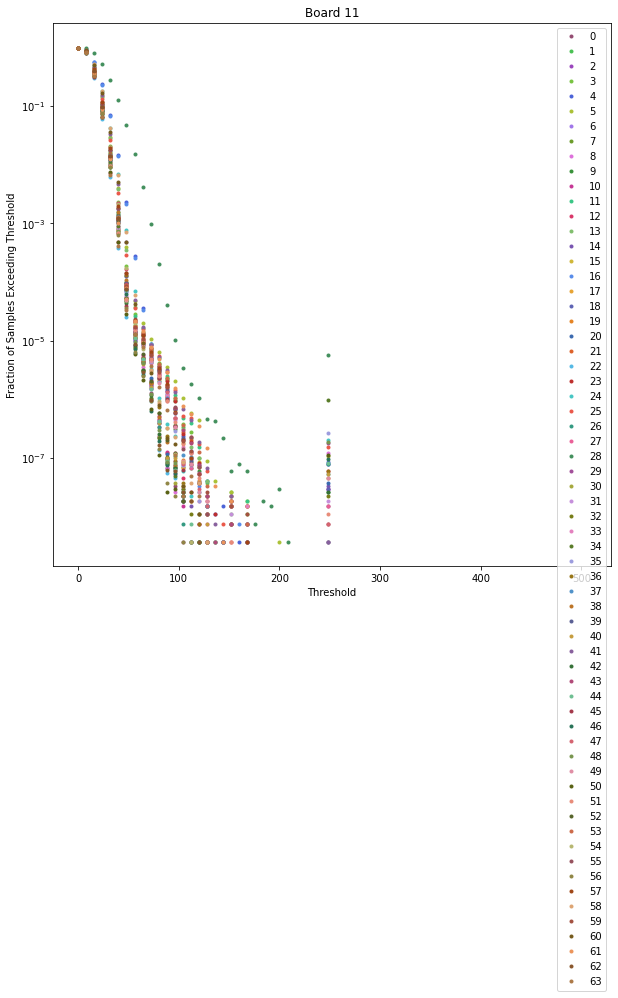

In [48]:

results_core=np.load(fnamec)
results_veto=np.load(fnamev)
rate_core = results_core/(2**28 - 1)
rate_veto = results_veto/(2**28 - 1)
thresholds = 8*np.asarray(range(64))
vthresholds = np.flip(thresholds)

colors = ["#934b71","#48c152","#9a44bc","#78c341","#4a62d8","#abc136","#a076e9","#6b9c29","#dd70db","#389139","#c63695","#39c685","#d93668","#81be6d","#7854b1","#d0b737","#578cea","#e7a332","#5d63b4","#e58323","#3a69af","#dd6128","#54b9e5","#be2e2c","#46c6c4","#ea5749","#329981","#ea6098","#428f5c","#a24e99","#a6a83d","#c58fdb","#767c16","#e381be","#587b28","#9c9cde","#987516","#5092c9","#bd7426","#5a5f94","#c69d3f","#88609d","#357137","#b14a78","#6ebf92","#a4384a","#277257","#d56470","#78964f","#e08ea5","#586113","#e88c79","#56642b","#cd6a49","#b7b771","#96515d","#908645","#a04616","#dda573","#a45141","#755a1c","#ec945a","#89562c","#ad7947"]
for b in range(11):
    plt.figure(figsize=(10,10))
    plt.title("Board "+str(b+1))
    for a in range(64):
        plt.semilogy(thresholds,rate_core[a,:,b],'.',color=colors[a],label=str(a))

    plt.xlabel("Threshold")
    plt.ylabel("Fraction of Samples Exceeding Threshold")
    plt.legend()
    plt.show()


### How often are antennas saturating? -- harder to define here

In [15]:

'''# how often is saturation?
for b in range(11):
    plt.figure()
    plt.title("snap "+str(b+1))
    plt.hist(results_core[:,-1,b],80)
    plt.xlabel("Number of times smoothed filtered power > 508 adc units")
    plt.ylabel("Number of antennas")
    plt.show()

count=0
for b in range(11):
    for a in range(64):
        if results_core[a,-1,b]>1000:
            antname=mapping.snap2_to_antpol(b,a)
            print('antennas that saturated more than 1000 times',antname, ' snap ',b+1, results_core[a,-1,b])
            count+=1
print(count)

count=0
for b in range(11):
    for a in range(64):
        if results_core[a,-1,b]>100:
            antname=mapping.snap2_to_antpol(b,a)
            #print('antennas that saturated more than 100 times',antname, results_core[a,-1])
            count+=1
print(count)

count=0
for b in range(11):
    for a in range(64):
        if results_core[a,-1,b]>=1:
            antname=mapping.snap2_to_antpol(b,a)
            #print('antennas that saturated',antname, results_core[a,-1])
            count+=1   
print(count)
'''

'# how often is saturation?\nfor b in range(11):\n    plt.figure()\n    plt.title("snap "+str(b+1))\n    plt.hist(results_core[:,-1,b],80)\n    plt.xlabel("Number of times smoothed filtered power > 508 adc units")\n    plt.ylabel("Number of antennas")\n    plt.show()\n\ncount=0\nfor b in range(11):\n    for a in range(64):\n        if results_core[a,-1,b]>1000:\n            antname=mapping.snap2_to_antpol(b,a)\n            print(\'antennas that saturated more than 1000 times\',antname, \' snap \',b+1, results_core[a,-1,b])\n            count+=1\nprint(count)\n\ncount=0\nfor b in range(11):\n    for a in range(64):\n        if results_core[a,-1,b]>100:\n            antname=mapping.snap2_to_antpol(b,a)\n            #print(\'antennas that saturated more than 100 times\',antname, results_core[a,-1])\n            count+=1\nprint(count)\n\ncount=0\nfor b in range(11):\n    for a in range(64):\n        if results_core[a,-1,b]>=1:\n            antname=mapping.snap2_to_antpol(b,a)\n            

## Threshold scan for every board individually but in (approximately) parallel

In [49]:

#set up coincidencer
trigger_power_thresh=0 #will set later, in steps during scan
veto_power_thresh=0
trigger_window=int(round(1.96e8*100/3e8,1)) #number of clock cycles to travel 100 meters
veto_window=0
antenna_number_thresh=0 # will set later, in steps during scan
veto_number_thresh=0
core_roles_array=np.ones(64,dtype=int)
veto_roles_array=np.ones(64,dtype=int) #not using for now

[setup_coincidencer(casperbrd,trigger_power_thresh,
                          veto_power_thresh,
                          trigger_window,
                          veto_window,
                          antenna_number_thresh,
                          veto_number_thresh,
                          core_roles_array,
                          veto_roles_array) for casperbrd in casperbrds]

# define settings to loop through
voltage_thresh=np.asarray([25,50,75,100,150,200])
ant_number_thresh=np.asarray([4,7,10,20])
core_coincidences=np.zeros((len(voltage_thresh),len(ant_number_thresh),11))

for m in range(len(ant_number_thresh)):
    [setvalue(casperbrd,'antenna_number_thresh','cr_registers.xlsx',int(ant_number_thresh[m])) for casperbrd in casperbrds]
    for i in range(len(voltage_thresh)):
        t_c = voltage_thresh[i]
        [setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",int(t_c**2)) for casperbrd in casperbrds]
        time.sleep(2.75)  #have to wait for it to update
        for b, casperbrd in enumerate(casperbrds):
            veto_coincidence,core_coincidence=casperbrd.read_list_from_ram("cosmic_ray_core_and_veto_rate",2,'u4')
            core_coincidences[i,m,b]=core_coincidence

In [50]:
np.save(fnameout,core_coincidences)

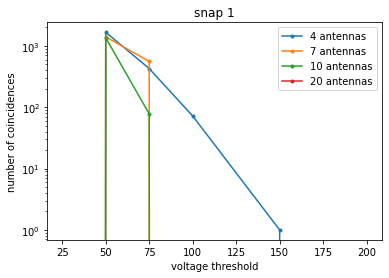

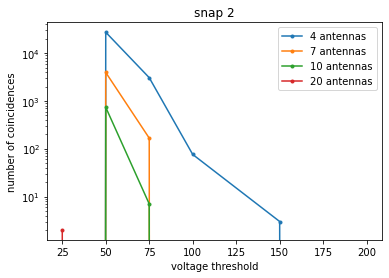

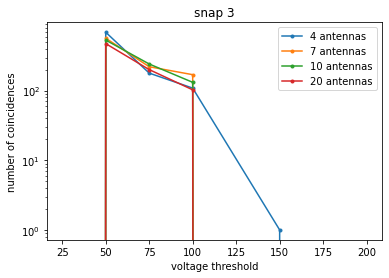

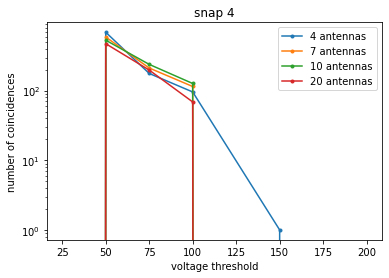

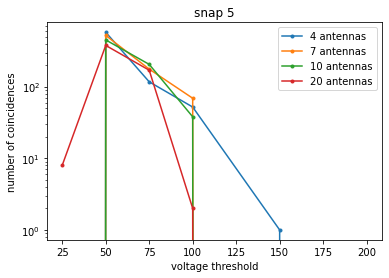

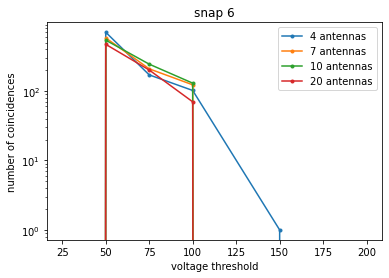

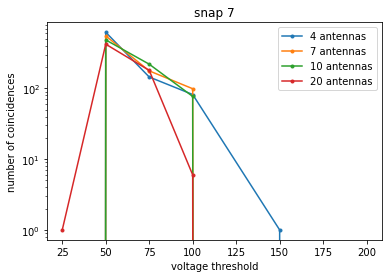

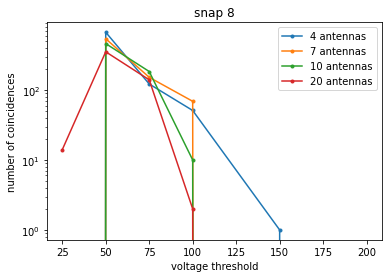

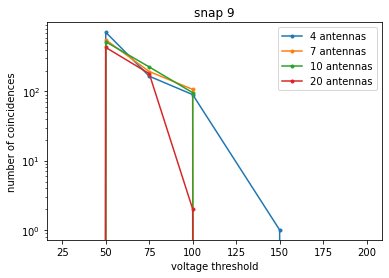

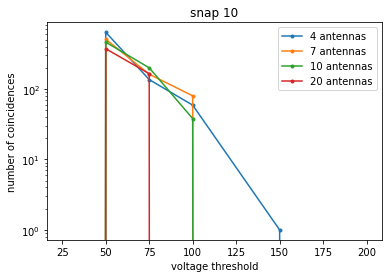

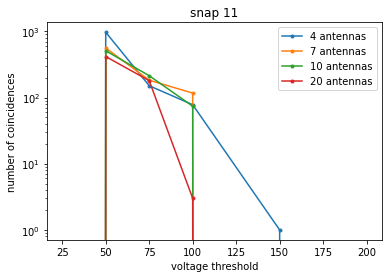

In [52]:
core_coincidences=np.load(fnameout)
for b in range(11):
    plt.figure()
    plt.title("snap "+str(b+1))

    for m in range(len(ant_number_thresh)):
        plt.semilogy(voltage_thresh,core_coincidences[:,m,b],'.-',label=str(ant_number_thresh[m])+ ' antennas')
    plt.legend()
    plt.xlabel('voltage threshold')
    plt.ylabel('number of coincidences')

This are plots of the number of events meeting the coincident trigger condition, for different voltage thresholds and antenna number thresholds. Note that no veto antennas were set and each measurement is done sequentially, in a dynamic RFI environment.

## Scan using veto antennas 



In [53]:
current_ok_vetos=np.load('/home/ubuntu/kp/ok_vetos-2024-2-21.npy')
current_ok_core=np.load('/home/ubuntu/kp/ok_core-2024-2-21.npy')
for p in range(11):
    veto_roles_array=current_ok_vetos[p,:]
    core_roles_array=current_ok_core[p,:]
    print(veto_roles_array)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

In [60]:
[setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",0) for casperbrd in casperbrds]

brdnames=['snap01','snap02','snap03','snap04','snap05','snap06','snap07','snap08','snap09','snap10','snap11']
indices_of_good_snaps=[2,3,4,5,6,7,8,9,10]
ngoodsnaps=len(indices_of_good_snaps)
#set up coincidencer
current_ok_vetos=np.load('/home/ubuntu/kp/ok_vetos-2024-2-20.npy')
current_ok_core=np.load('/home/ubuntu/kp/ok_core-2024-2-20.npy')

trigger_power_thresh=150**2
veto_power_thresh=150**2



trigger_window=int(round(1.96e8*100/3e8,1)) #number of clock cycles to travel 100 meters
veto_window=int(round(1.96e8*2000/3e8,1)) #number of clock cycles to travel 2000 meters
antenna_number_thresh=7 
veto_number_thresh=0 # will set later, in steps during scan

for p in indices_of_good_snaps:
    veto_roles_array=current_ok_vetos[p,:]
    core_roles_array=current_ok_core[p,:]
    #core_roles_array=np.ones(current_ok_core[p,:].shape) #TEST TURN ALL ANTENNAS ON

    casperbrd=casperbrds[p]

    setup_coincidencer(casperbrd,trigger_power_thresh,
                          veto_power_thresh,
                          trigger_window,
                          veto_window,
                          antenna_number_thresh,
                          veto_number_thresh,
                          core_roles_array,
                          veto_roles_array)
    setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",1)

veto_number_thresholds=[63,63,63,63,63,63,63,63]

snapshots_per_second=np.zeros((len(veto_number_thresholds),11))
core_triggers=np.zeros((len(veto_number_thresholds),11))
veto_triggers=np.zeros((len(veto_number_thresholds),11))
core_cycles=np.zeros((len(veto_number_thresholds),11))
veto_cycles=np.zeros((len(veto_number_thresholds),11))
successful_triggers=np.zeros((len(veto_number_thresholds),11))
readout_dones=np.zeros((len(veto_number_thresholds),11))

for i, n in enumerate(veto_number_thresholds):
    [setvalue(casperbrd,"veto_number_thresh","cr_registers.xlsx",n) for casperbrd in casperbrds]
    time.sleep(2.75)  #wait to update

    for p in range(11): 
        casperbrd=casperbrds[p]
        veto_coincidence,core_coincidence=casperbrd.read_list_from_ram("cosmic_ray_core_and_veto_rate",2,'u4')
        veto_total_cycles,core_total_cycles=casperbrd.read_list_from_ram("cosmic_ray_core_n_veto_tot_clk_cycles",2,'u4')
        readout_done,successful_trigger=casperbrd.read_list_from_ram("cosmic_ray_core_n_veto_tot_clk_cycles1",2,'u4')

        core_cycles[i,p]=core_total_cycles
        veto_cycles[i,p]=veto_total_cycles
        core_triggers[i,p]=core_coincidence                  
        veto_triggers[i,p]=veto_coincidence 
        readout_dones[i,p]=readout_done
        successful_triggers[i,p]=successful_trigger
        #print(p,n,core_coincidence,veto_coincidence,core_total_cycles,veto_total_cycles)


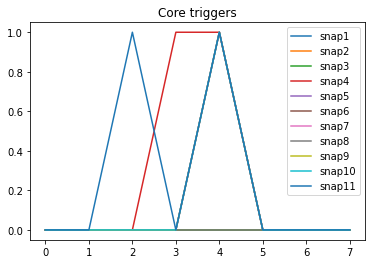

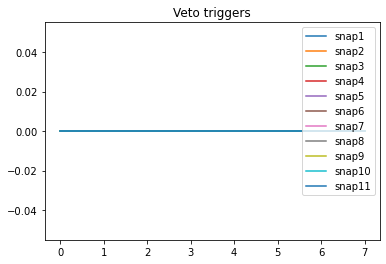

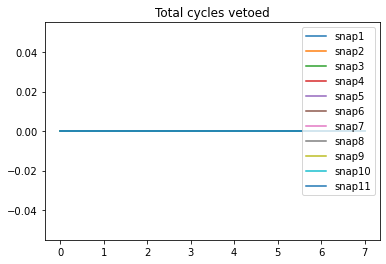

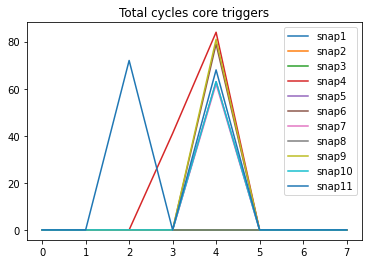

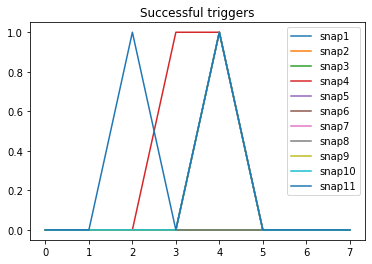

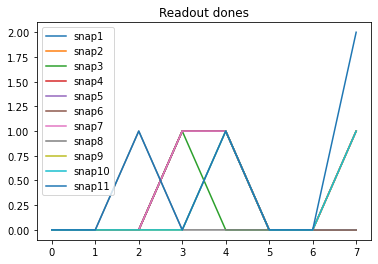

In [61]:
plt.figure()
for i in range(11):
    plt.title('Core triggers')  #note core is ALL antennas
    plt.plot(core_triggers[:,i],label='snap'+str(i+1))
plt.legend()

plt.figure()
for i in range(11):
    plt.title('Veto triggers')
    plt.plot(veto_triggers[:,i],label='snap'+str(i+1))
plt.legend()

plt.figure()
for i in range(11):
    plt.title('Total cycles vetoed')
    plt.plot(veto_cycles[:,i],label='snap'+str(i+1))
plt.legend()
    
plt.figure()
for i in range(11):
    plt.title('Total cycles core triggers')
    plt.plot(core_cycles[:,i],label='snap'+str(i+1))
plt.legend()

plt.figure()
for i in range(11):
    plt.title('Successful triggers')
    plt.plot(successful_triggers[:,i],label='snap'+str(i+1))
plt.legend()

plt.figure()
for i in range(11):
    plt.title('Readout dones')
    plt.plot(readout_dones[:,i],label='snap'+str(i+1))
plt.legend()

### Completely reset trigger on all boards. It's good to run this at the end before running something else to configure the trigger for observing.

In [62]:
## Completely reset trigger on all boards
veto_roles_array=np.zeros(64,dtype=int)
core_roles_array=np.zeros(64,dtype=int)
for p in range(11):
    casperbrd=casperbrds[p]
    setup_coincidencer(casperbrd,0,
                          0,
                          0,
                          0,
                          0,
                          0,
                          core_roles_array,
                          veto_roles_array)
    setvalue(casperbrd,"enable_coinc_trig","cr_registers.xlsx",0)
